In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1. Preprocess the dataset by encoding categorical variables and handling missing values.
2. Train a machine learning algorithm on the dataset, such as a Decision Tree or Random Forest, to classify mushrooms as edible or poisonous.
3. Analyze feature importance to understand which characteristics contribute most to the classification.
4. Evaluate the model’s performance using accuracy, precision, recall, and F1-score metrics.

- In this project, we will examine the data and create a machine learning algorithm that will detect if the mushroom is edible or poisonous by its specifications like cap shape, cap color, gill color, etc. using different classifiers.
- The dataset used in this project is "mushrooms.csv" which contains 8124 instances of mushrooms with 23 features like cap-shape, cap-surface, cap-color, bruises, odor, etc. and is made available by UCI Machine Learning.

In [ ]:
data = pd.read_csv('/content/mushrooms.csv') # importing the dataset
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


- After importing the data, to learn more about the dataset, we'll use .head() .info() and .describe() methods.

In [ ]:
data.shape #shape of the data

(8124, 23)

In [ ]:
data.info() # most of the values are not_null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

# No missing values

In [ ]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
list_cols = data.columns.to_list() # columns to list

In [ ]:
data['bruises'].value_counts()

f    4748
t    3376
Name: bruises, dtype: int64

- Checking the number of categories in each column.

In [ ]:
for col in list_cols:
  print('Number of Categories in the {}'.format(col))
  print(data[col].value_counts())
  print('-----------------------------')
  print('-----------------------------')

Number of Categories in the class
e    4208
p    3916
Name: class, dtype: int64
-----------------------------
-----------------------------
Number of Categories in the cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
-----------------------------
-----------------------------
Number of Categories in the cap-surface
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
-----------------------------
-----------------------------
Number of Categories in the cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64
-----------------------------
-----------------------------
Number of Categories in the bruises
f    4748
t    3376
Name: bruises, dtype: int64
-----------------------------
-----------------------------
Number of Categories in the odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name:

<Axes: xlabel='percent', ylabel='class'>

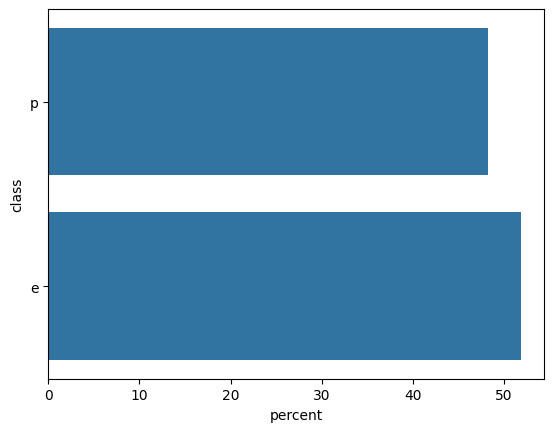

In [ ]:

sns.countplot(data[list_cols[0]],stat='percent')

- Data is close to balanced.

In [ ]:
data.shape

(8124, 23)

# univariate Analysis

<ipython-input-130-98bf61950fd0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col],palette='icefire',stat='percent')


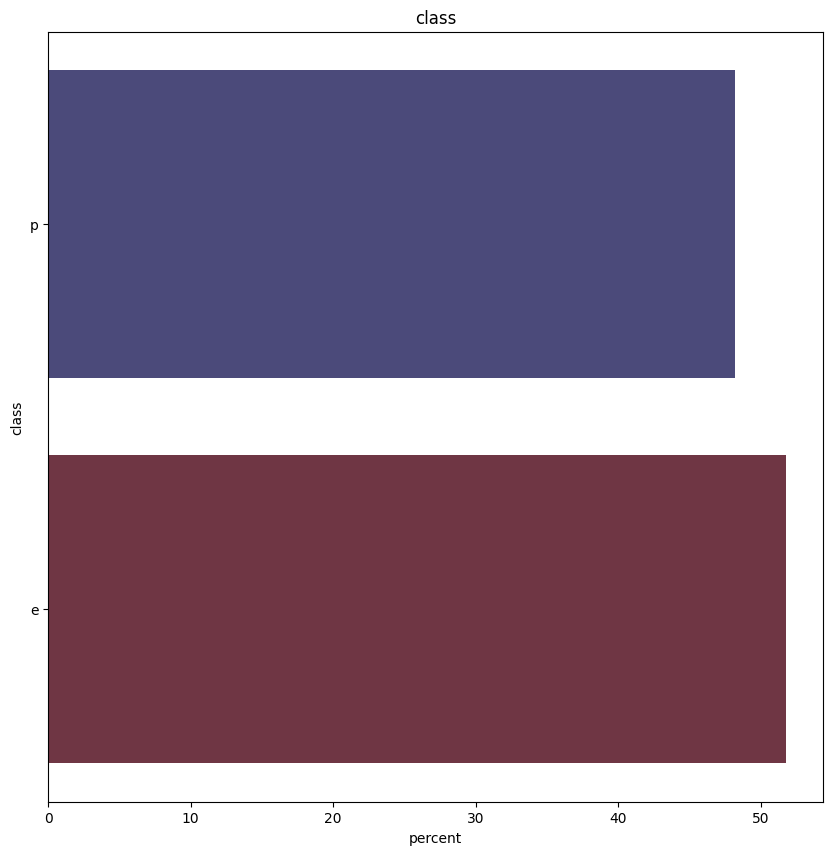

% in total
e    51.8
p    48.2
Name: class, dtype: float64


<ipython-input-130-98bf61950fd0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col],palette='icefire',stat='percent')


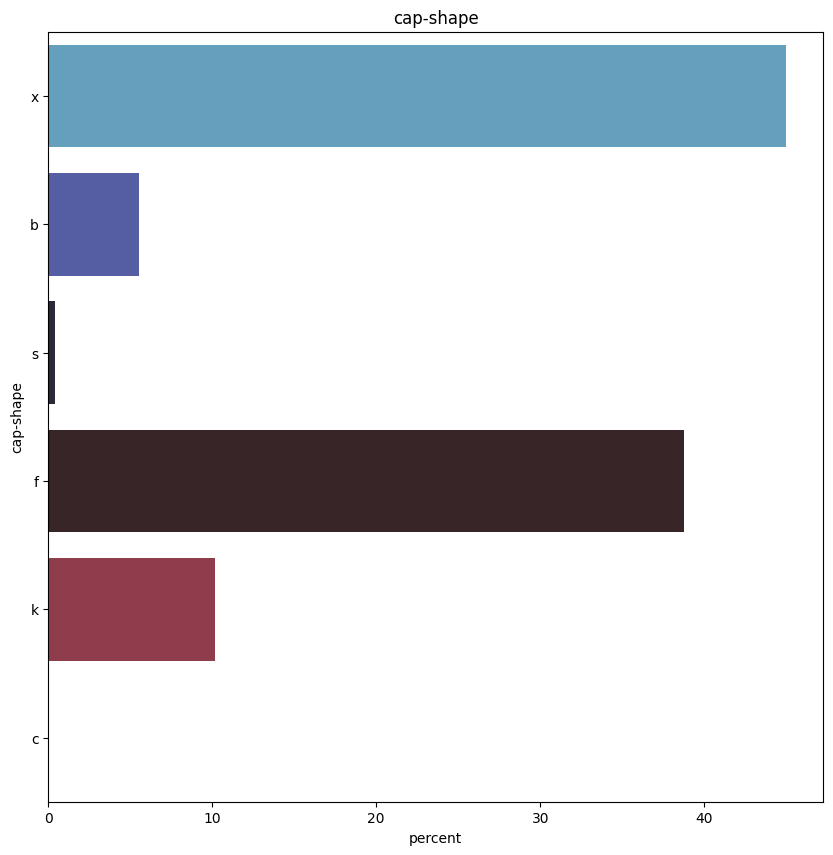

% in total
x    45.00
f    38.80
k    10.19
b     5.56
s     0.39
c     0.05
Name: cap-shape, dtype: float64


<ipython-input-130-98bf61950fd0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col],palette='icefire',stat='percent')


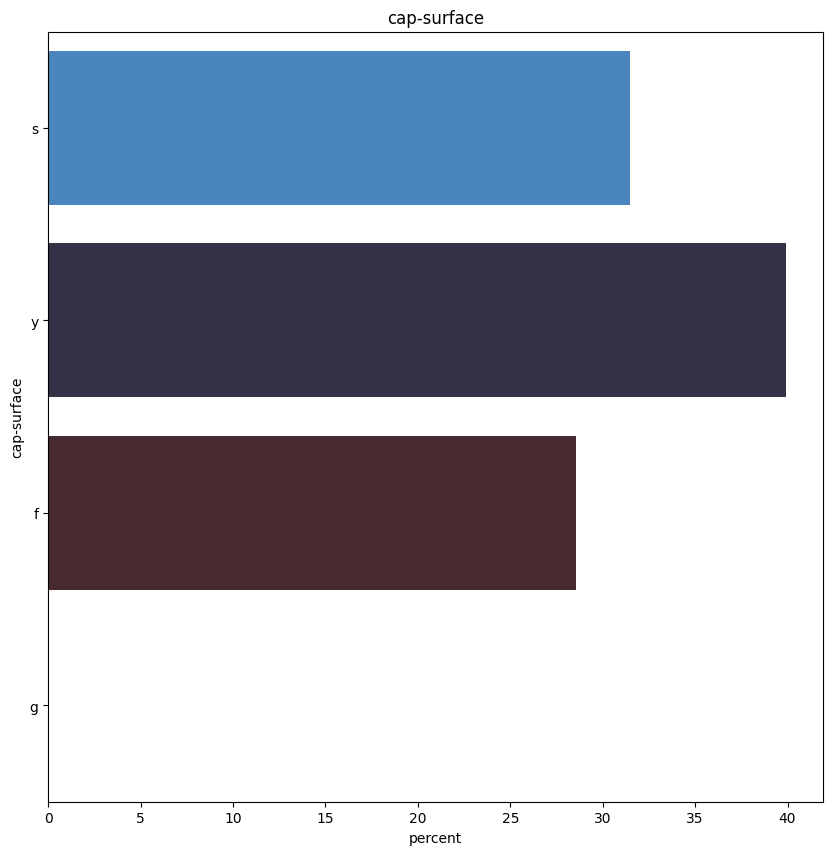

% in total
y    39.93
s    31.46
f    28.56
g     0.05
Name: cap-surface, dtype: float64


<ipython-input-130-98bf61950fd0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col],palette='icefire',stat='percent')


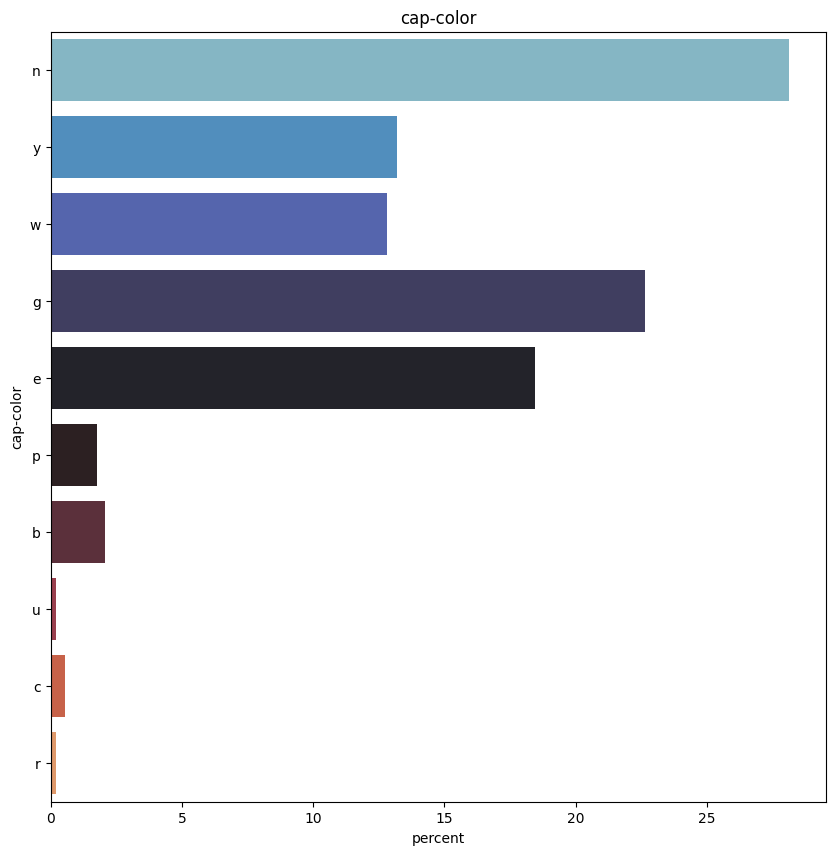

% in total
n    28.11
g    22.65
e    18.46
y    13.20
w    12.80
b     2.07
p     1.77
c     0.54
u     0.20
r     0.20
Name: cap-color, dtype: float64


<ipython-input-130-98bf61950fd0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col],palette='icefire',stat='percent')


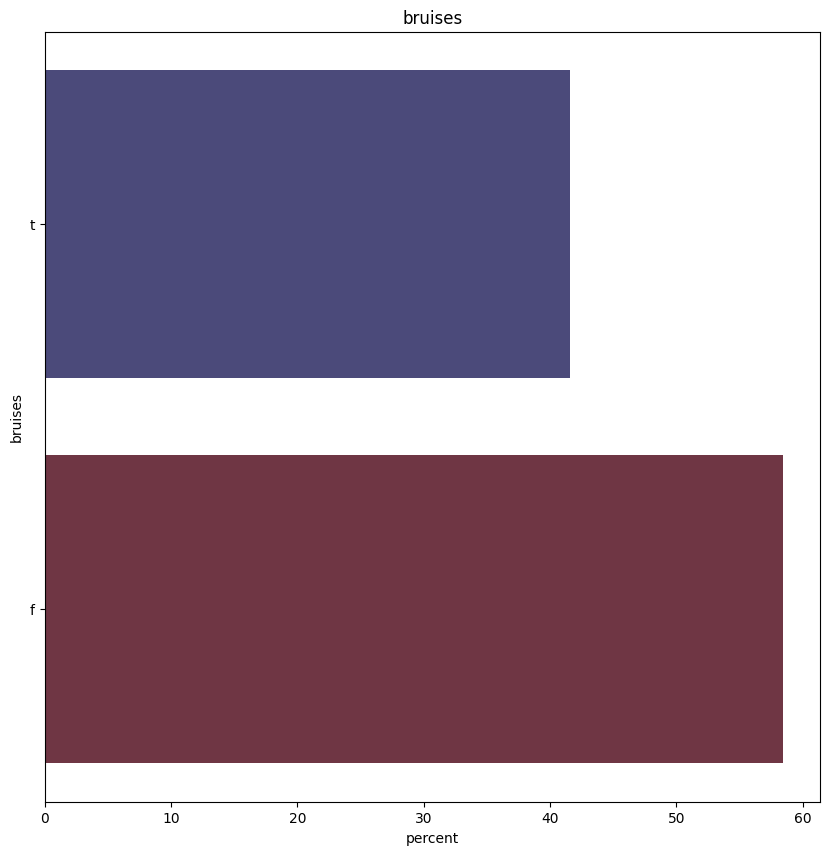

% in total
f    58.44
t    41.56
Name: bruises, dtype: float64


<ipython-input-130-98bf61950fd0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col],palette='icefire',stat='percent')


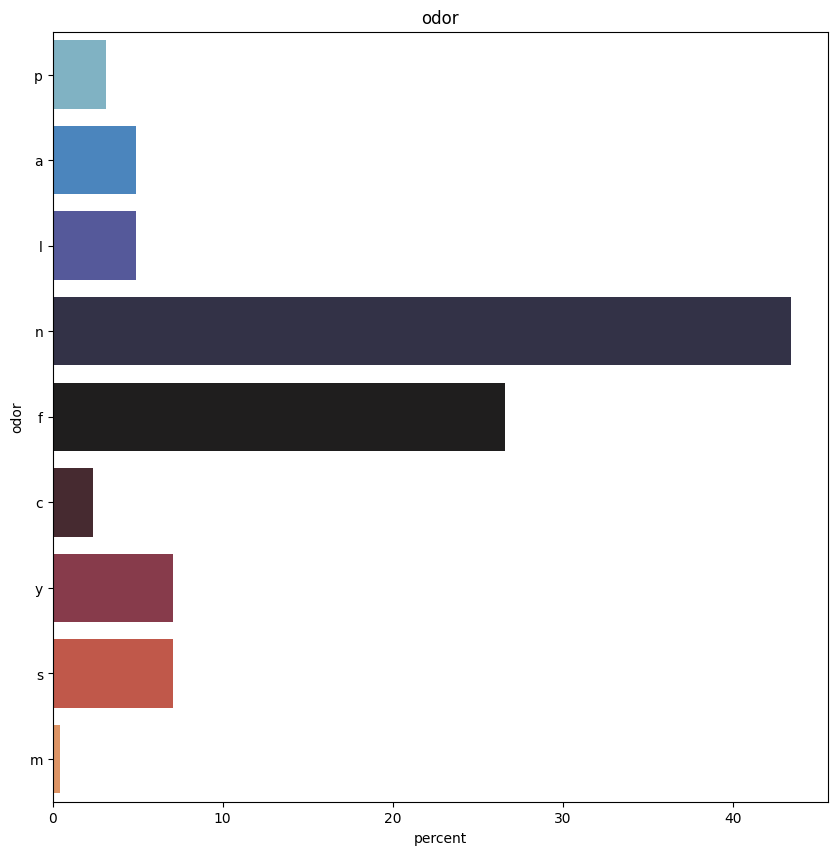

% in total
n    43.43
f    26.59
y     7.09
s     7.09
a     4.92
l     4.92
p     3.15
c     2.36
m     0.44
Name: odor, dtype: float64


<ipython-input-130-98bf61950fd0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col],palette='icefire',stat='percent')


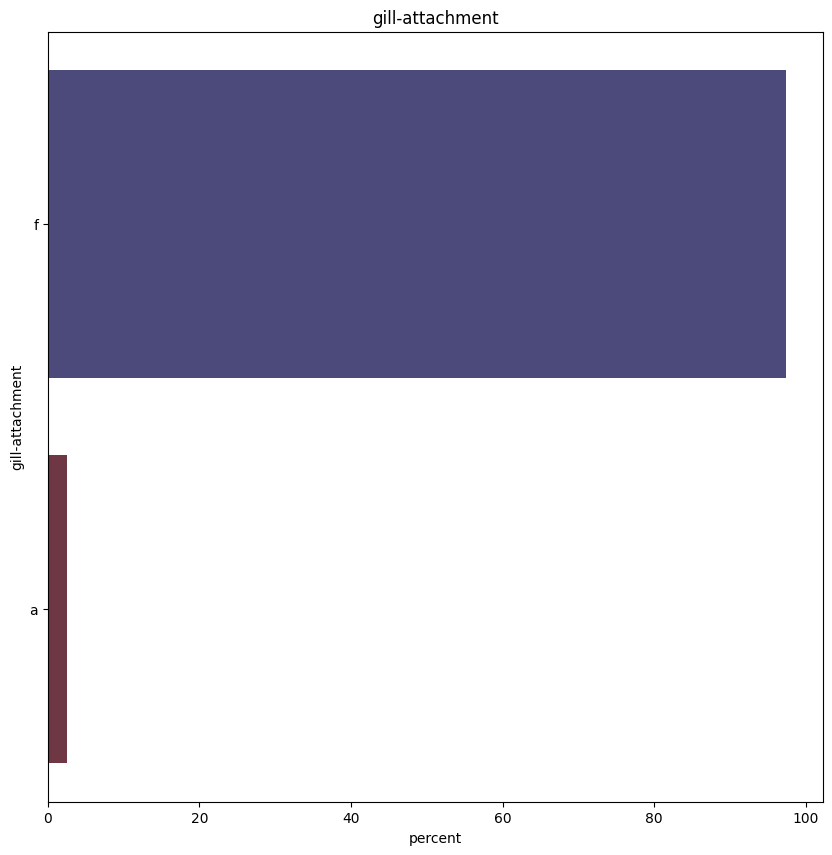

% in total
f    97.42
a     2.58
Name: gill-attachment, dtype: float64


<ipython-input-130-98bf61950fd0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col],palette='icefire',stat='percent')


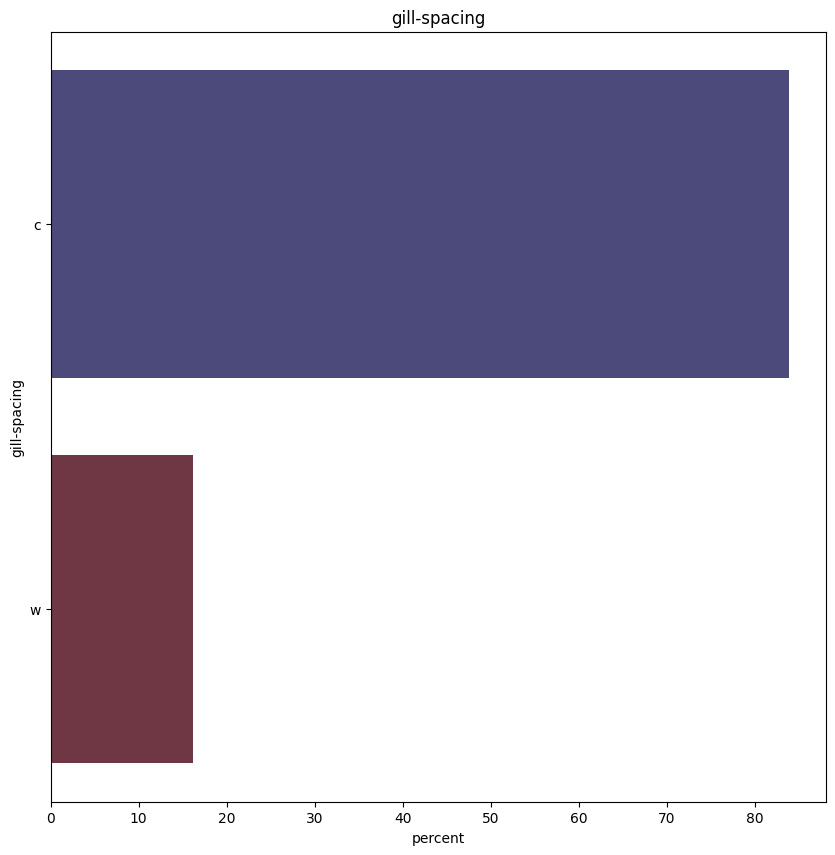

% in total
c    83.85
w    16.15
Name: gill-spacing, dtype: float64


<ipython-input-130-98bf61950fd0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col],palette='icefire',stat='percent')


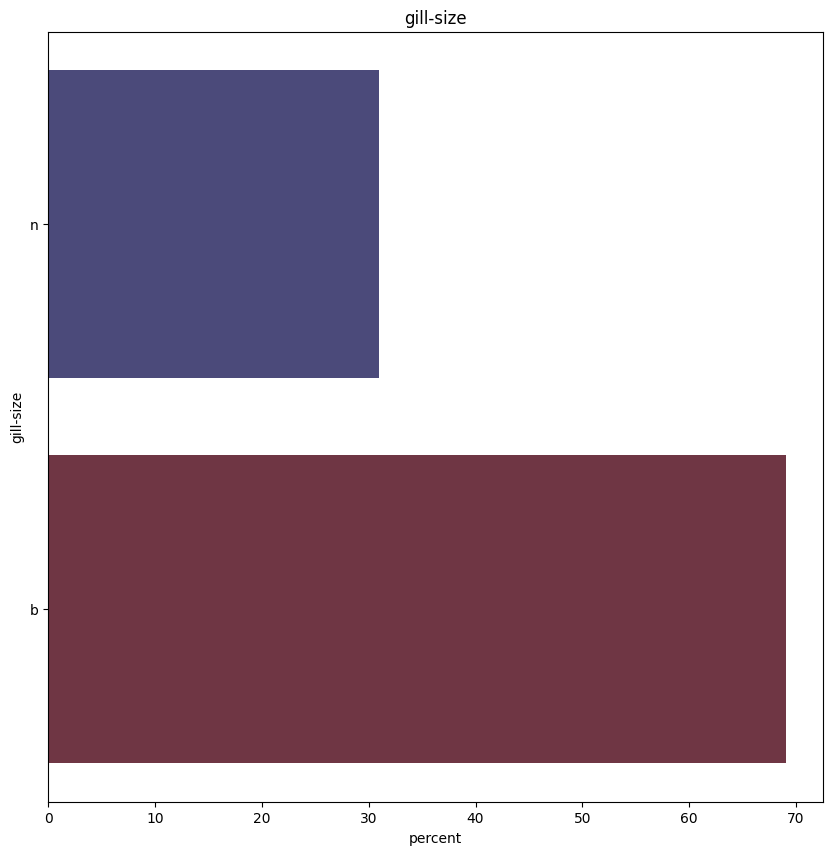

% in total
b    69.08
n    30.92
Name: gill-size, dtype: float64


<ipython-input-130-98bf61950fd0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col],palette='icefire',stat='percent')


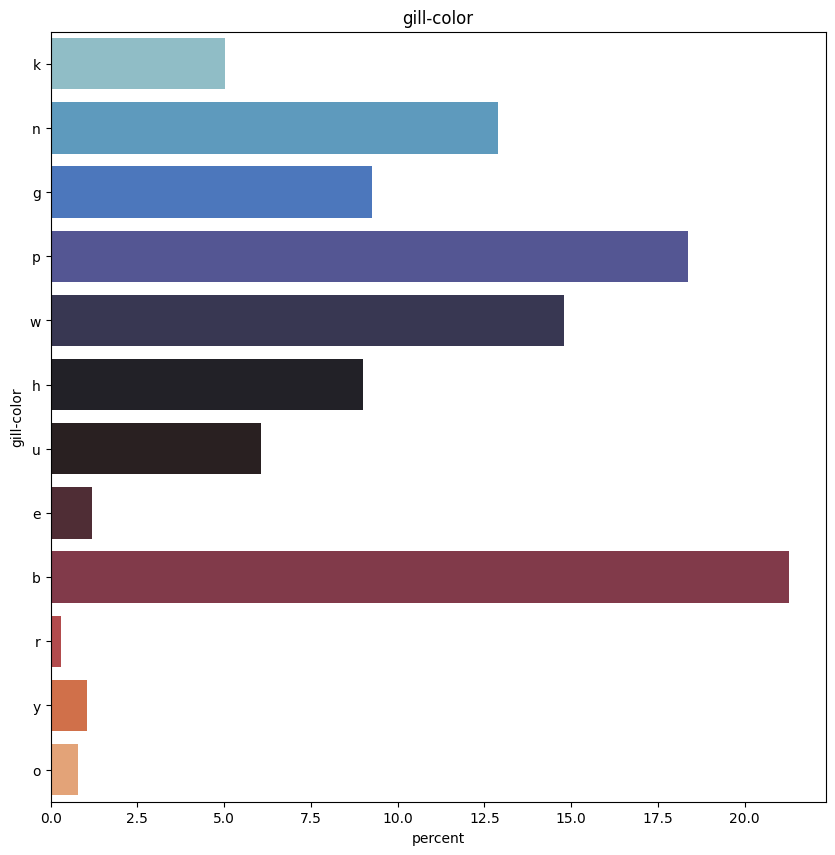

% in total
b    21.27
p    18.37
w    14.80
n    12.90
g     9.26
h     9.01
u     6.06
k     5.02
e     1.18
y     1.06
o     0.79
r     0.30
Name: gill-color, dtype: float64


<ipython-input-130-98bf61950fd0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col],palette='icefire',stat='percent')


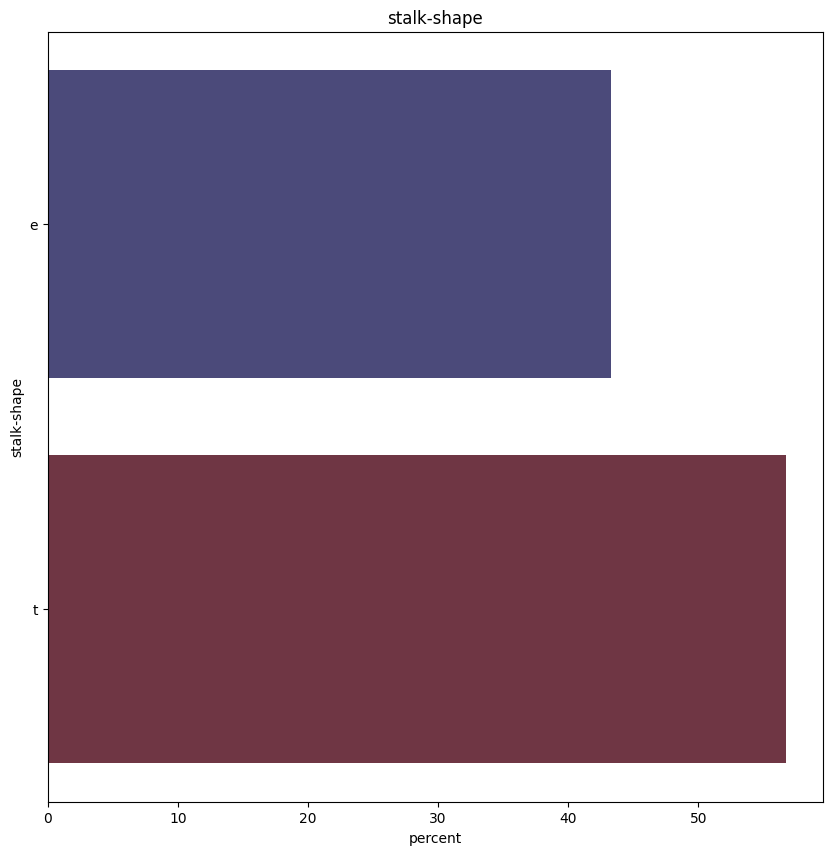

% in total
t    56.72
e    43.28
Name: stalk-shape, dtype: float64


<ipython-input-130-98bf61950fd0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col],palette='icefire',stat='percent')


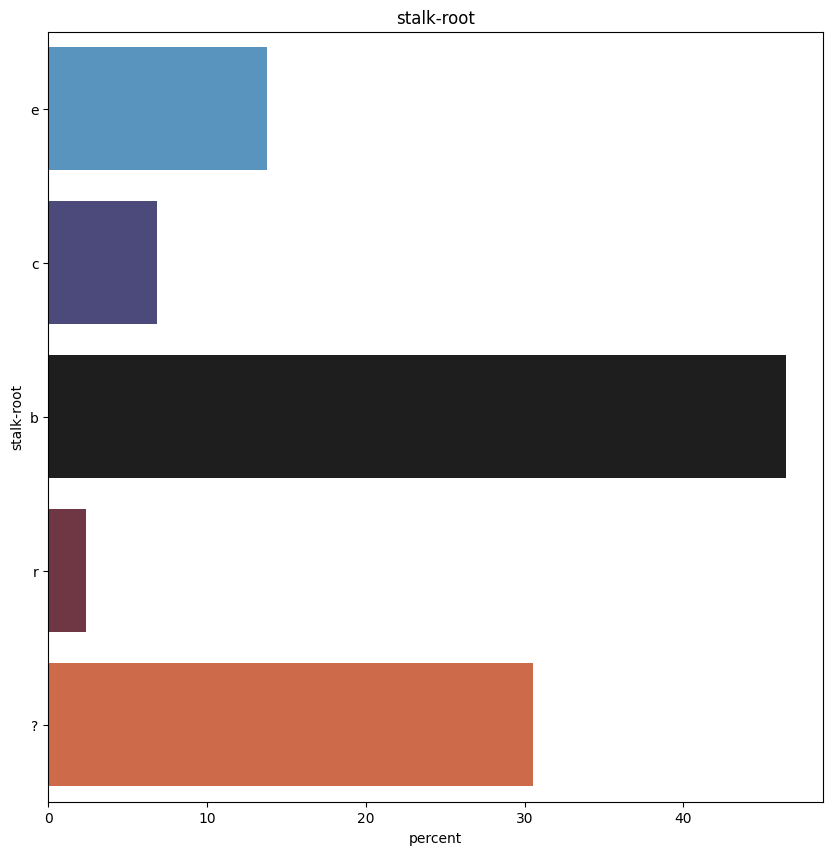

% in total
b    46.48
?    30.53
e    13.79
c     6.84
r     2.36
Name: stalk-root, dtype: float64


<ipython-input-130-98bf61950fd0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col],palette='icefire',stat='percent')


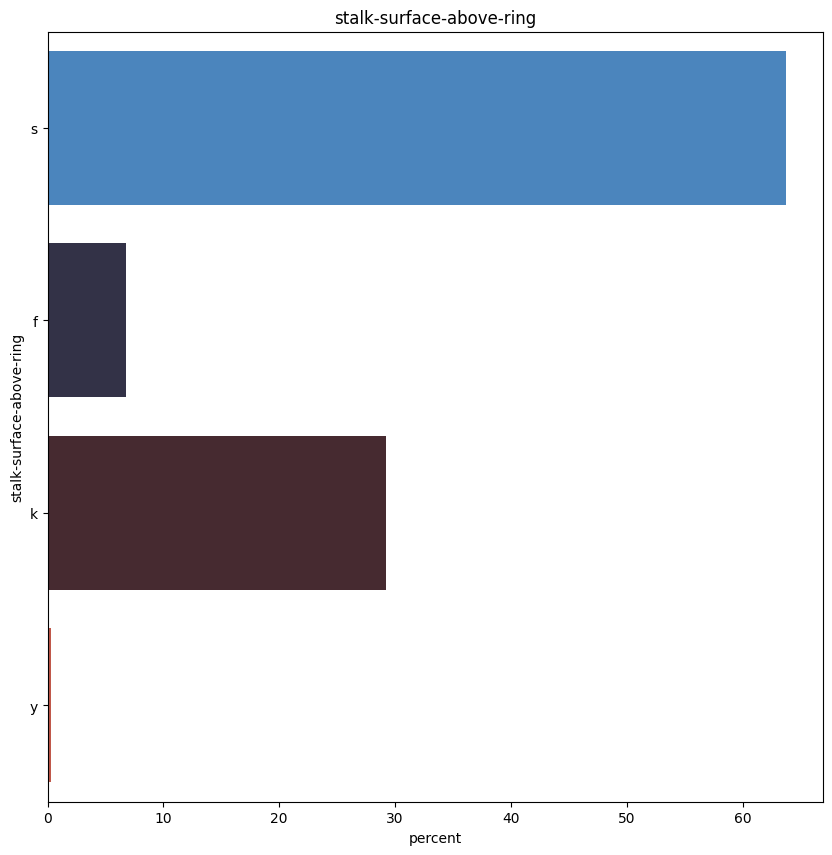

% in total
s    63.71
k    29.20
f     6.79
y     0.30
Name: stalk-surface-above-ring, dtype: float64


<ipython-input-130-98bf61950fd0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col],palette='icefire',stat='percent')


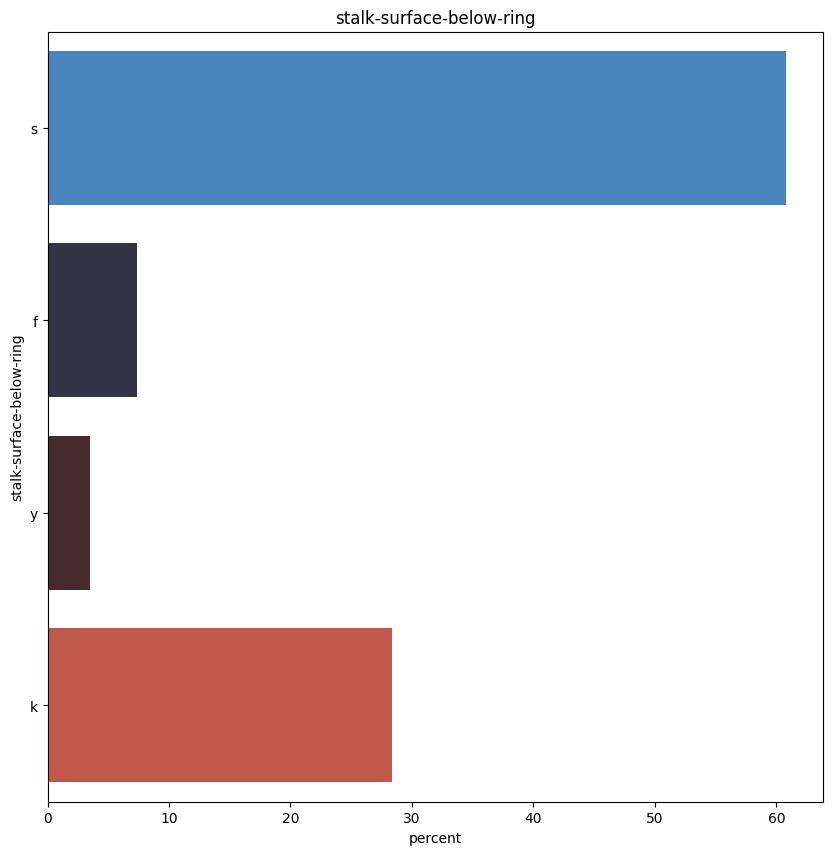

% in total
s    60.76
k    28.36
f     7.39
y     3.50
Name: stalk-surface-below-ring, dtype: float64


<ipython-input-130-98bf61950fd0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col],palette='icefire',stat='percent')


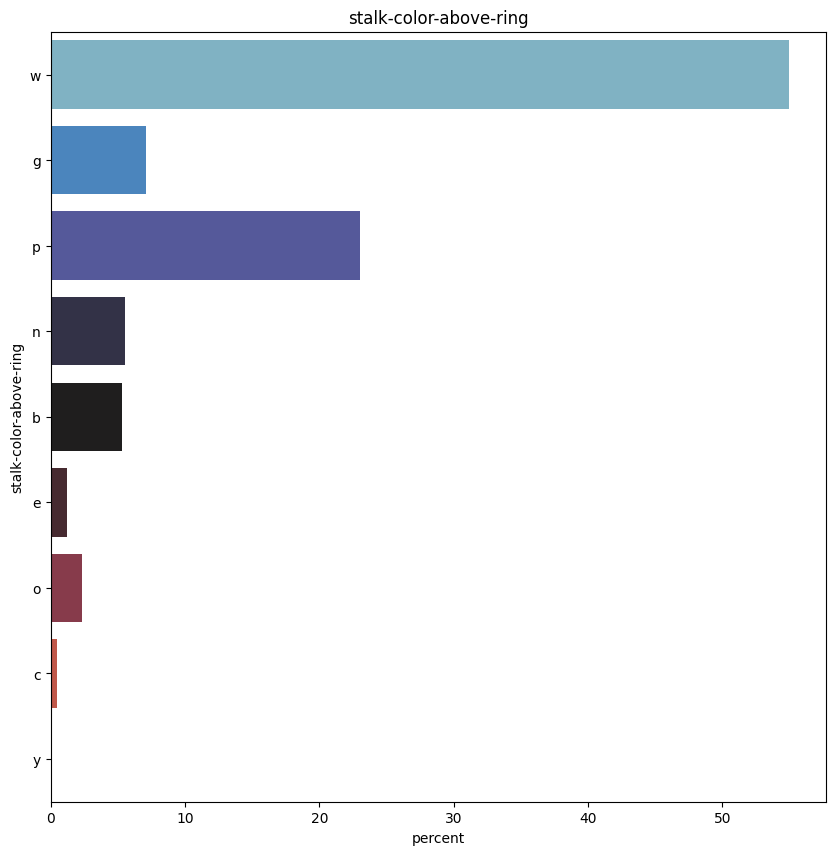

% in total
w    54.95
p    23.04
g     7.09
n     5.51
b     5.32
o     2.36
e     1.18
c     0.44
y     0.10
Name: stalk-color-above-ring, dtype: float64


<ipython-input-130-98bf61950fd0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col],palette='icefire',stat='percent')


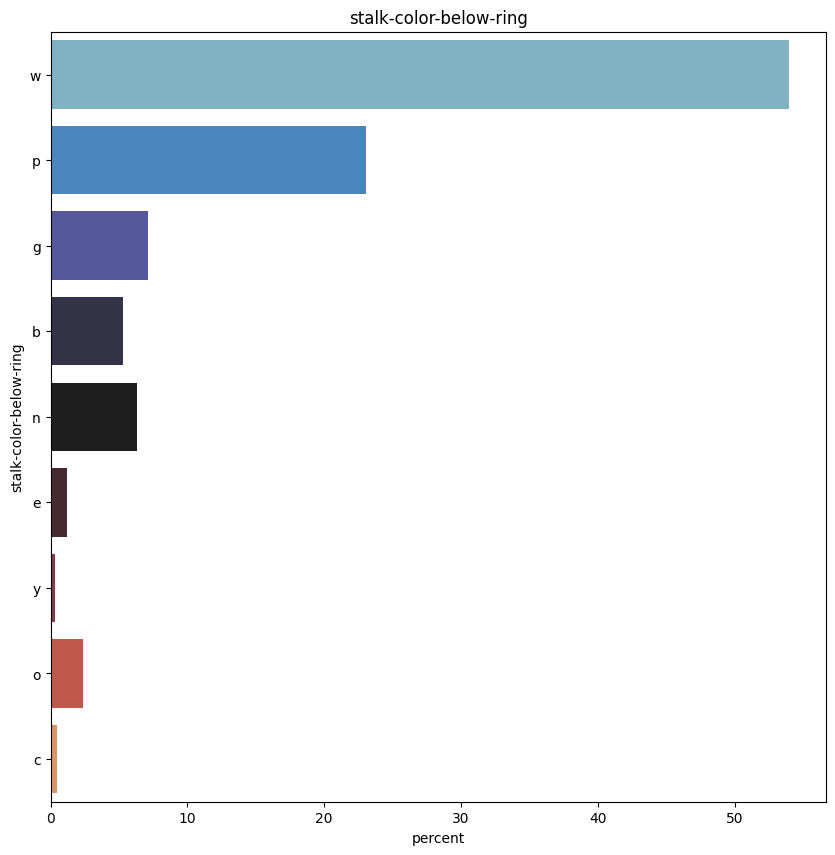

% in total
w    53.96
p    23.04
g     7.09
n     6.30
b     5.32
o     2.36
e     1.18
c     0.44
y     0.30
Name: stalk-color-below-ring, dtype: float64


<ipython-input-130-98bf61950fd0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col],palette='icefire',stat='percent')


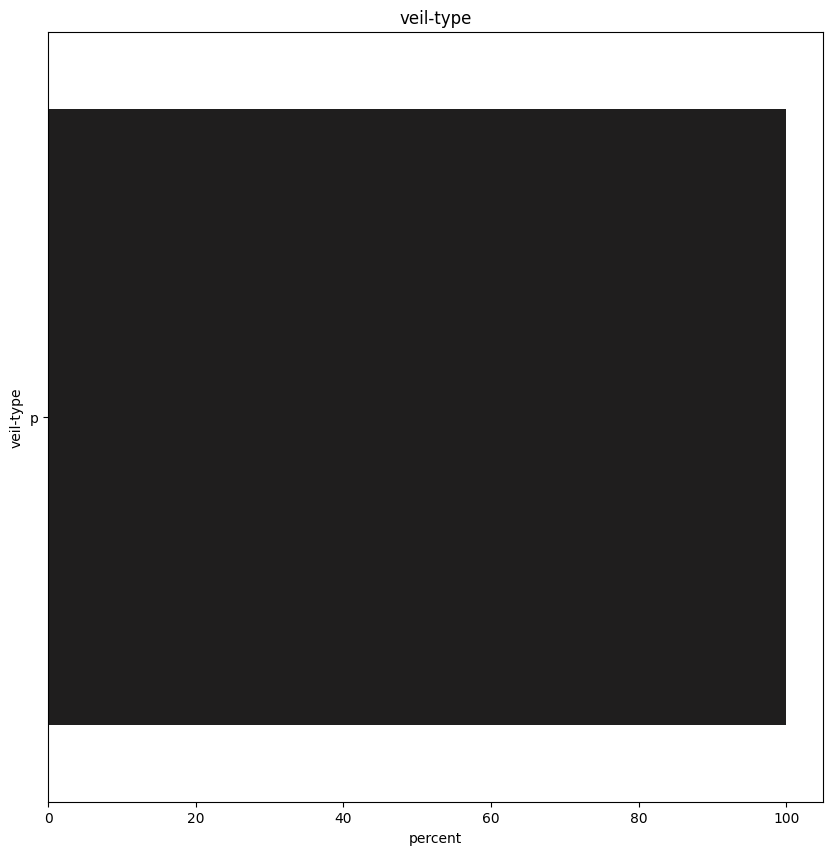

% in total
p    100.0
Name: veil-type, dtype: float64


<ipython-input-130-98bf61950fd0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col],palette='icefire',stat='percent')


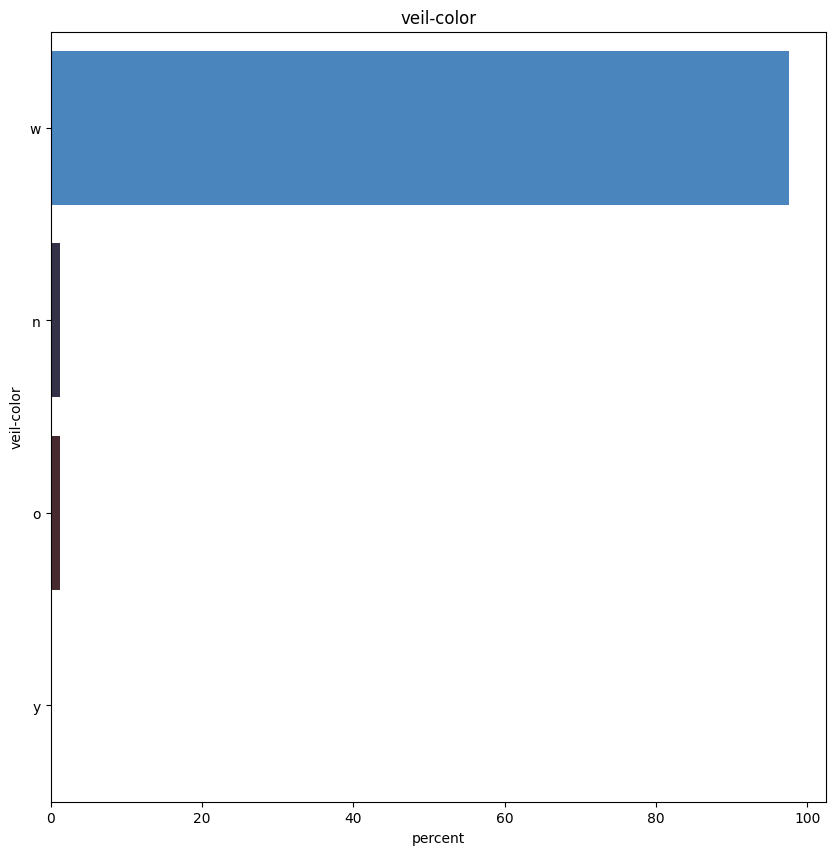

% in total
w    97.54
n     1.18
o     1.18
y     0.10
Name: veil-color, dtype: float64


<ipython-input-130-98bf61950fd0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col],palette='icefire',stat='percent')


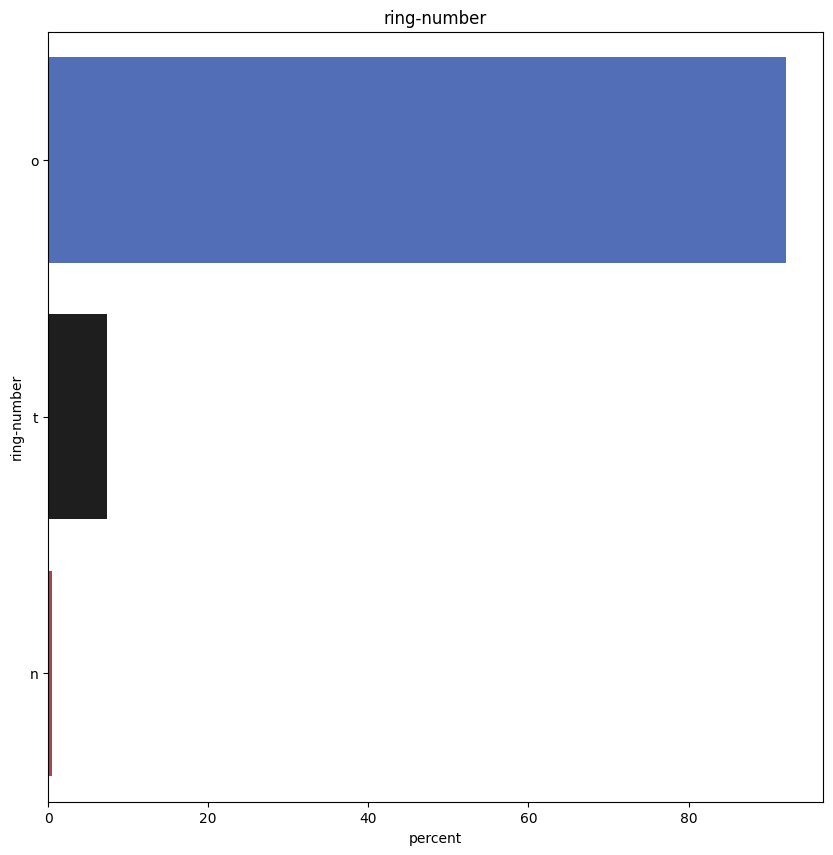

% in total
o    92.17
t     7.39
n     0.44
Name: ring-number, dtype: float64


<ipython-input-130-98bf61950fd0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col],palette='icefire',stat='percent')


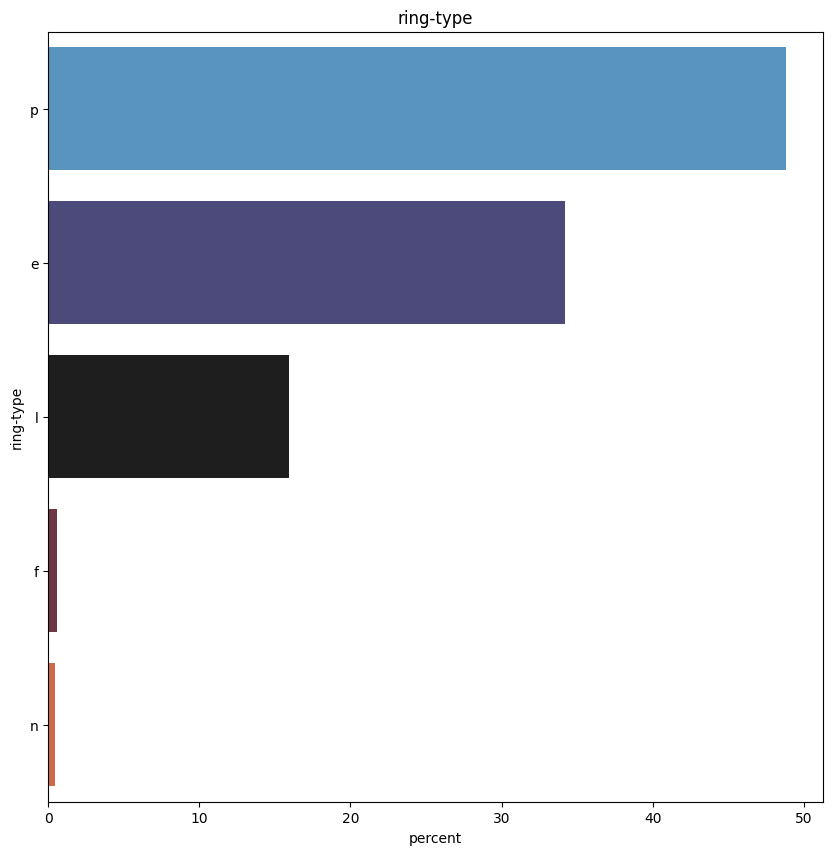

% in total
p    48.84
e    34.17
l    15.95
f     0.59
n     0.44
Name: ring-type, dtype: float64


<ipython-input-130-98bf61950fd0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col],palette='icefire',stat='percent')


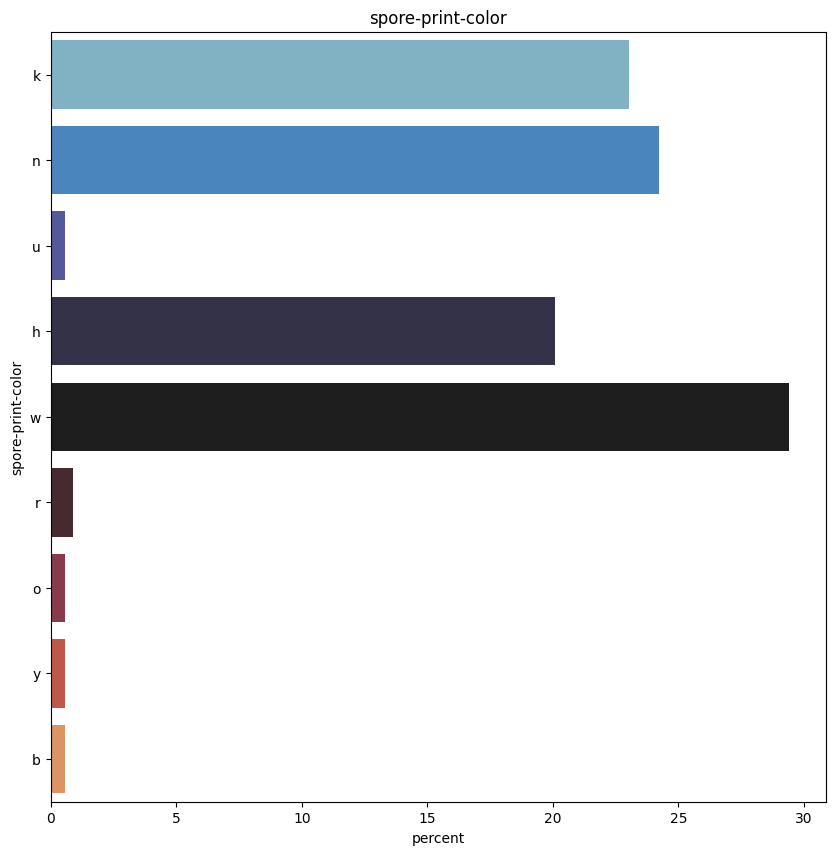

% in total
w    29.39
n    24.22
k    23.04
h    20.09
r     0.89
u     0.59
o     0.59
y     0.59
b     0.59
Name: spore-print-color, dtype: float64


<ipython-input-130-98bf61950fd0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col],palette='icefire',stat='percent')


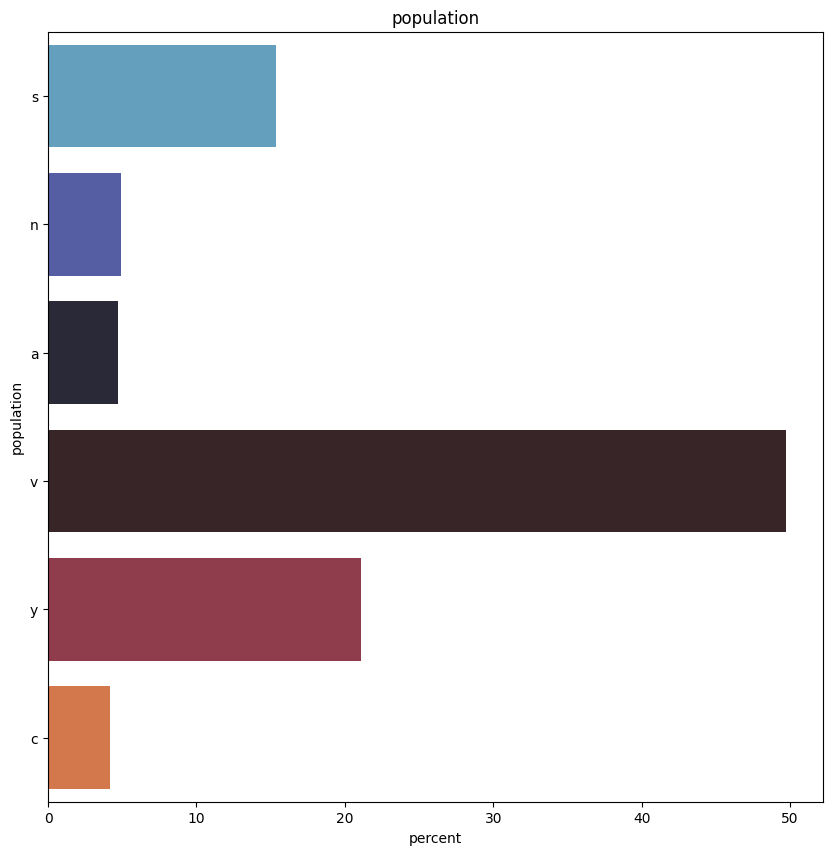

% in total
v    49.73
y    21.07
s    15.36
n     4.92
a     4.73
c     4.19
Name: population, dtype: float64


<ipython-input-130-98bf61950fd0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col],palette='icefire',stat='percent')


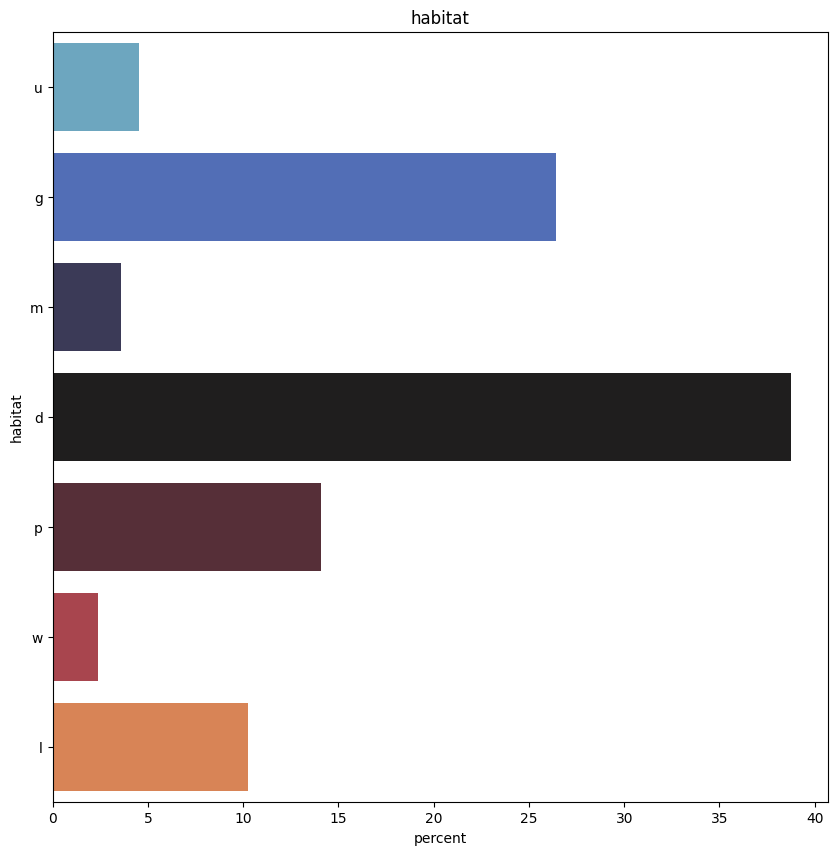

% in total
d    38.75
g    26.44
p    14.08
l    10.24
u     4.53
m     3.59
w     2.36
Name: habitat, dtype: float64


In [ ]:
for col in list_cols:
  plt.figure(figsize=(10,10))
  sns.countplot(data[col],palette='icefire',stat='percent')
  plt.title(col)
  plt.show()
  print('% in total')
  print(round((data[col].value_counts()/data.shape[0]),4)*100)

# Multivariate Analysis

In [ ]:
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

<ipython-input-143-648497213f20>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10,10))


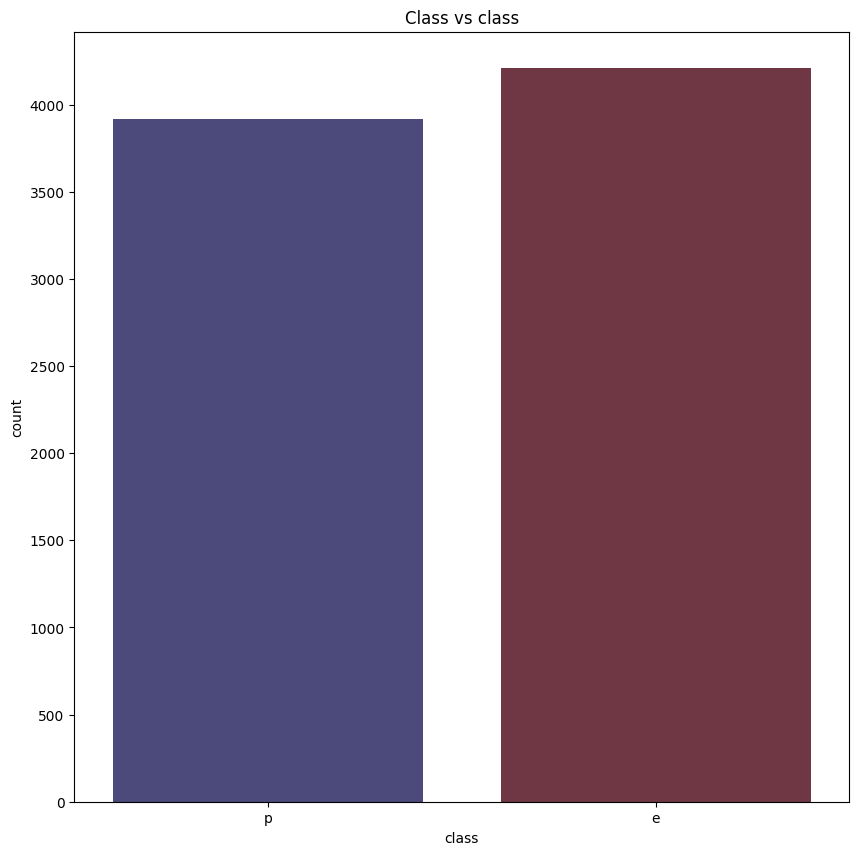

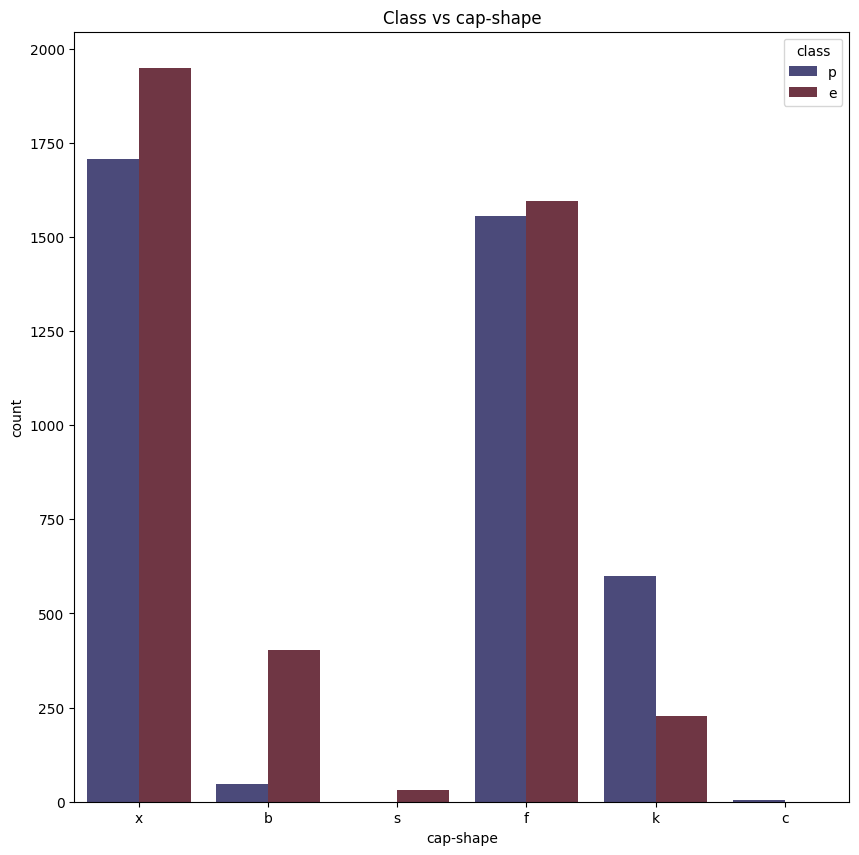

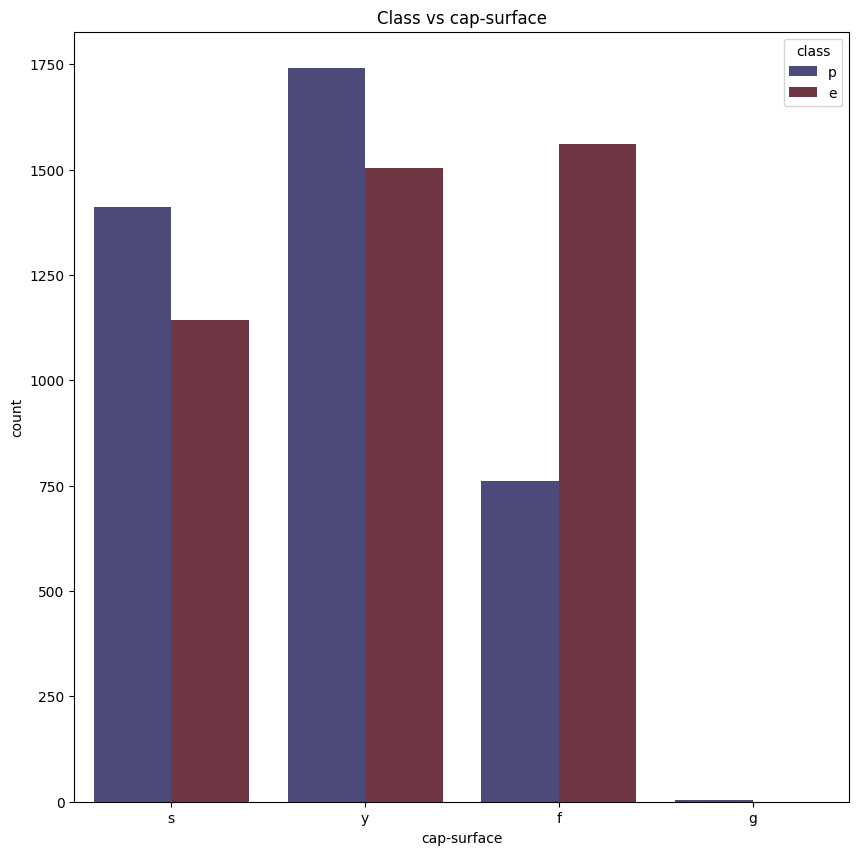

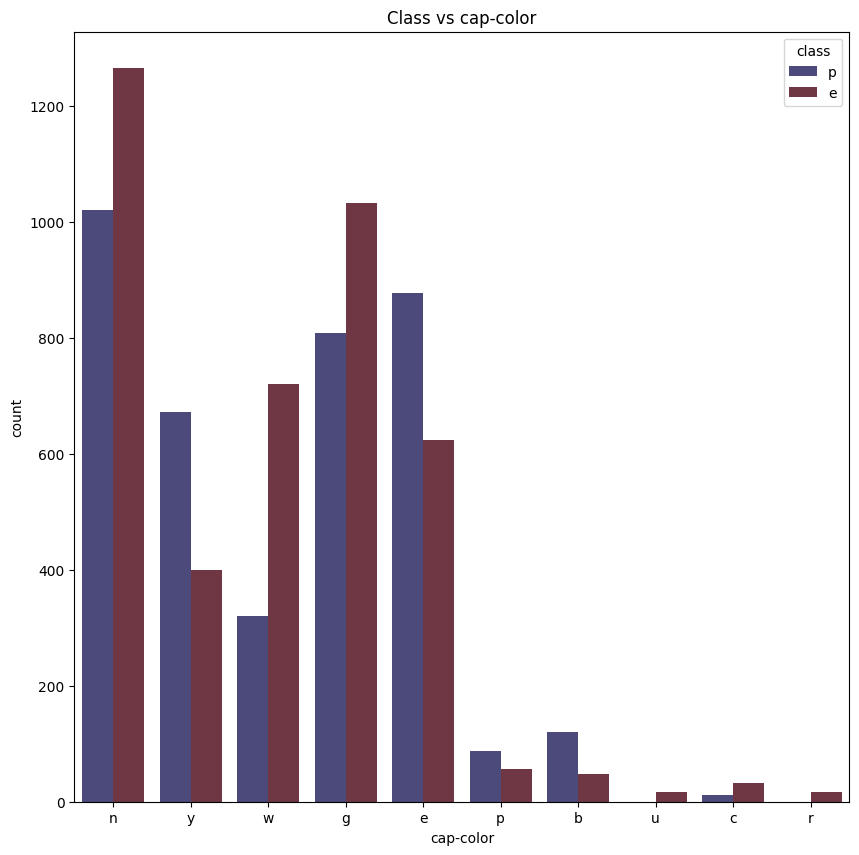

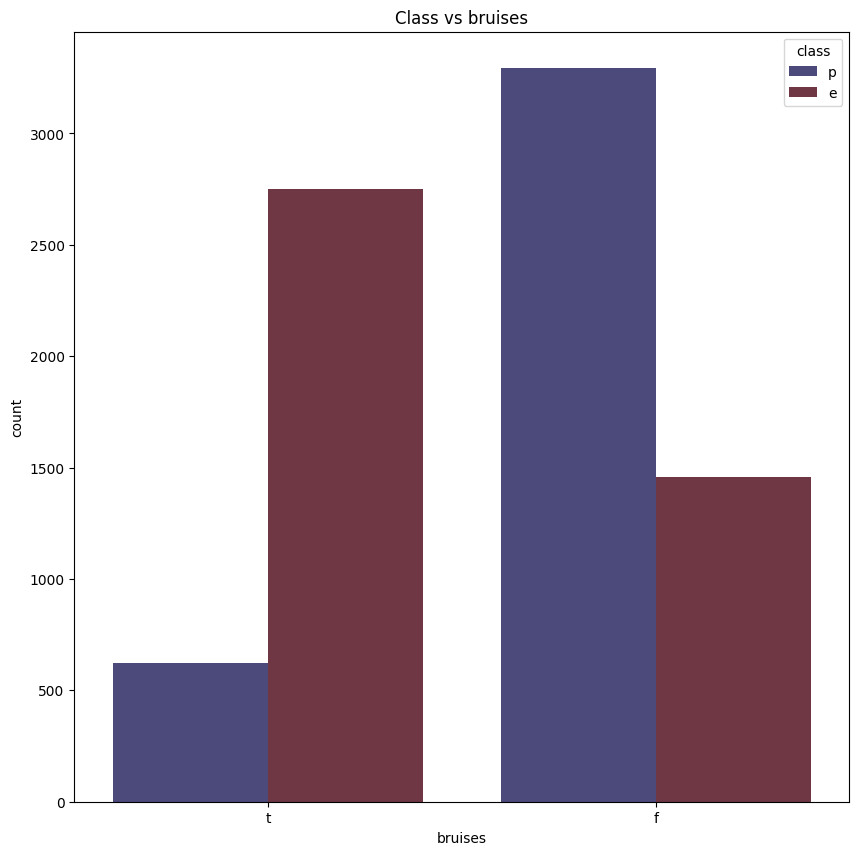

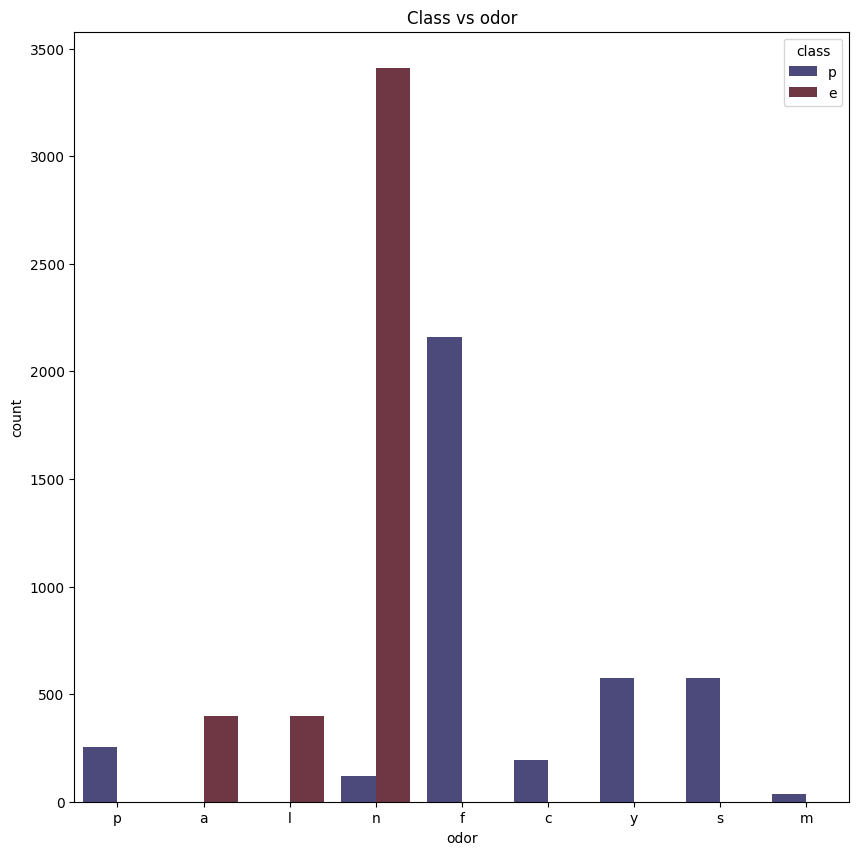

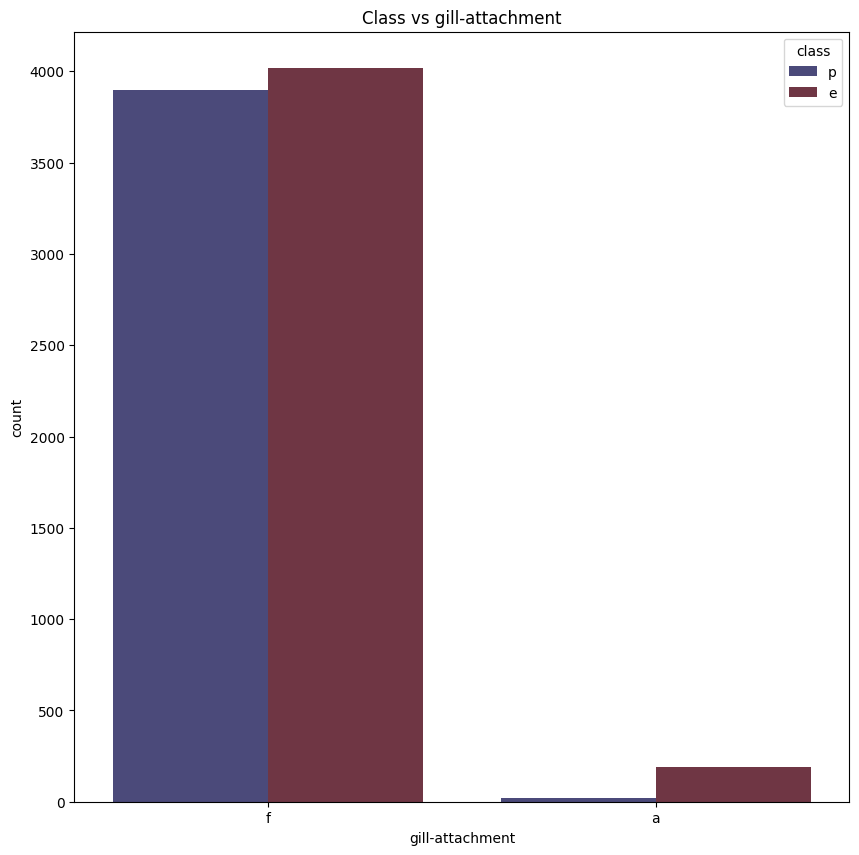

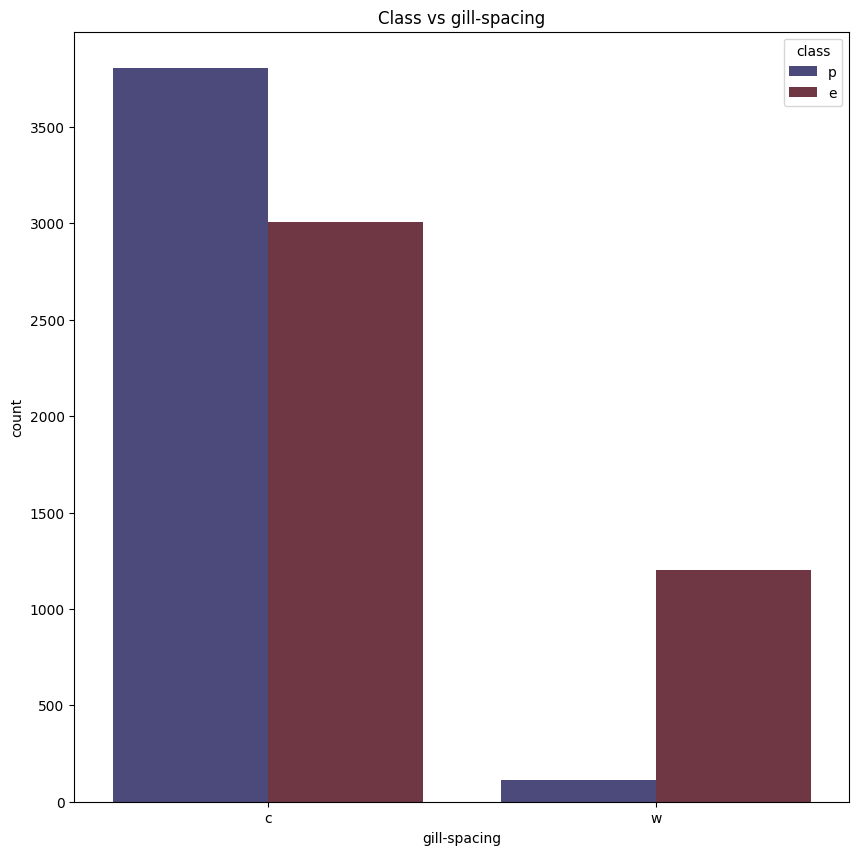

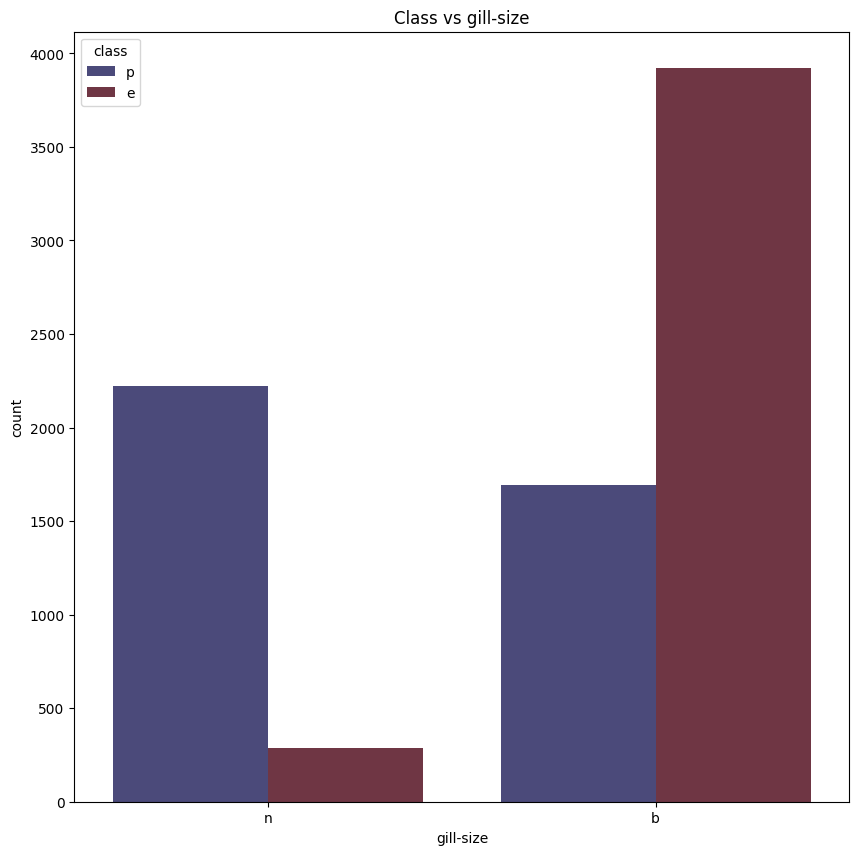

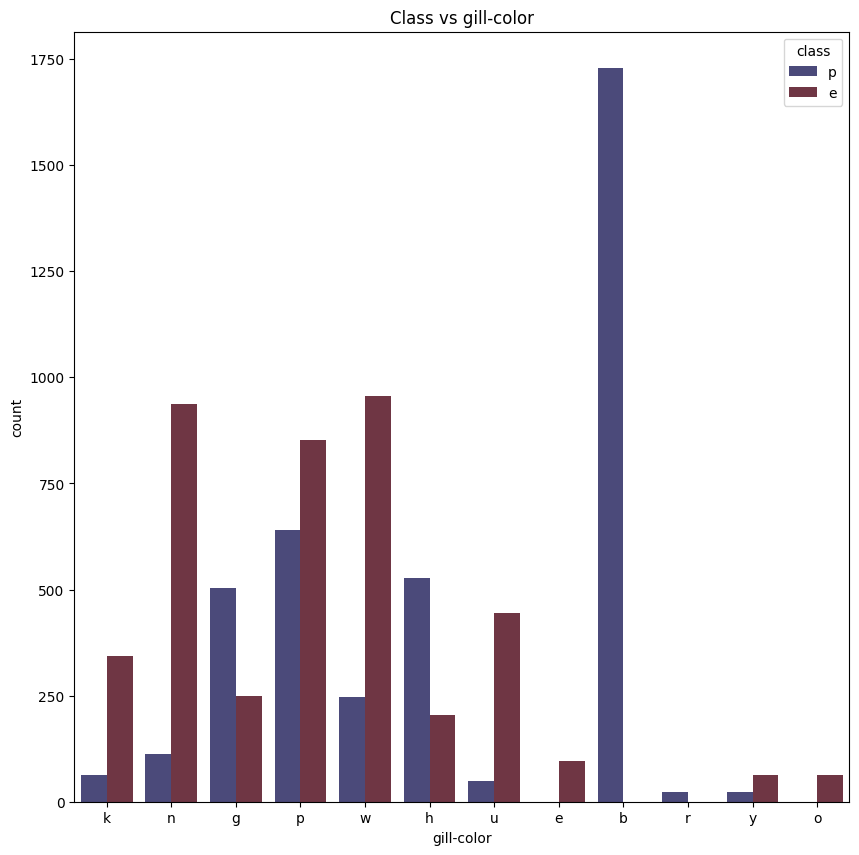

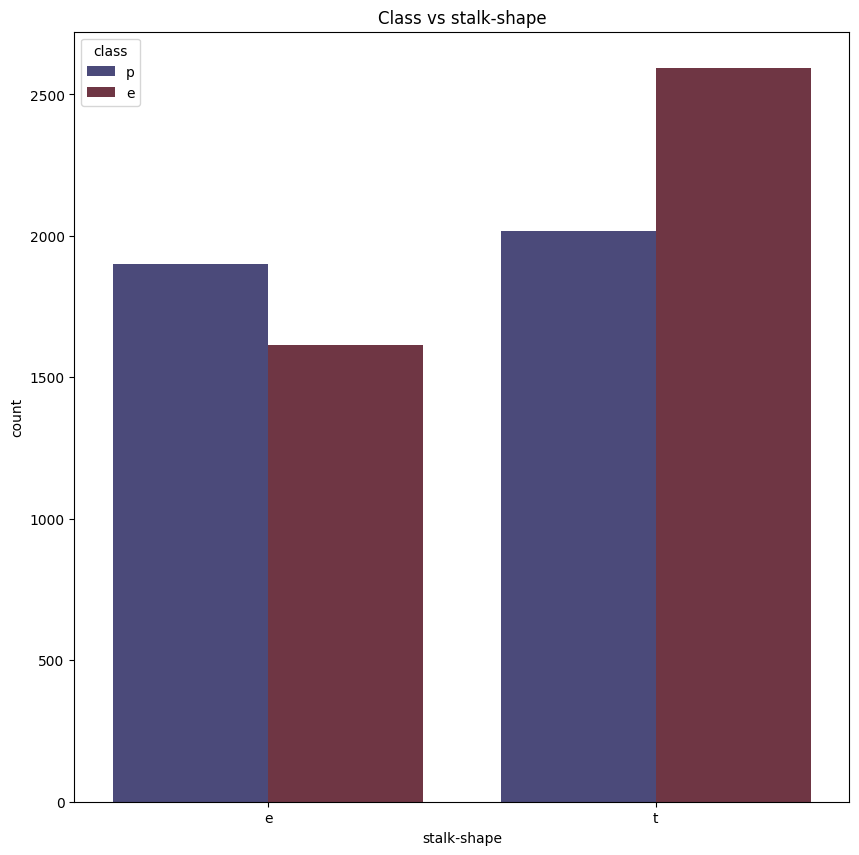

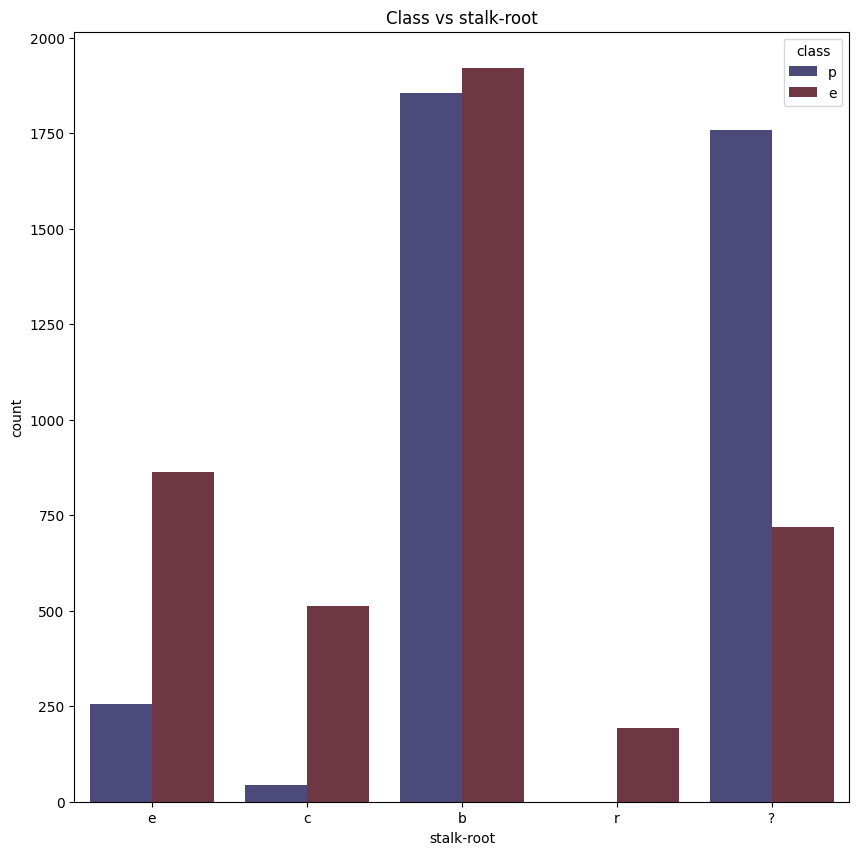

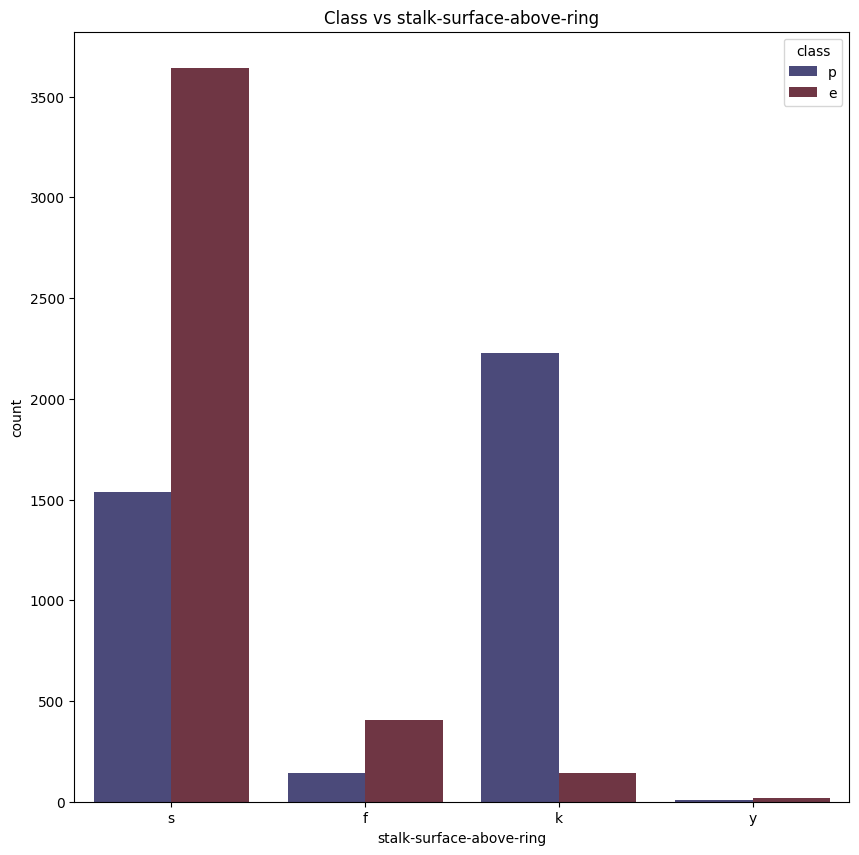

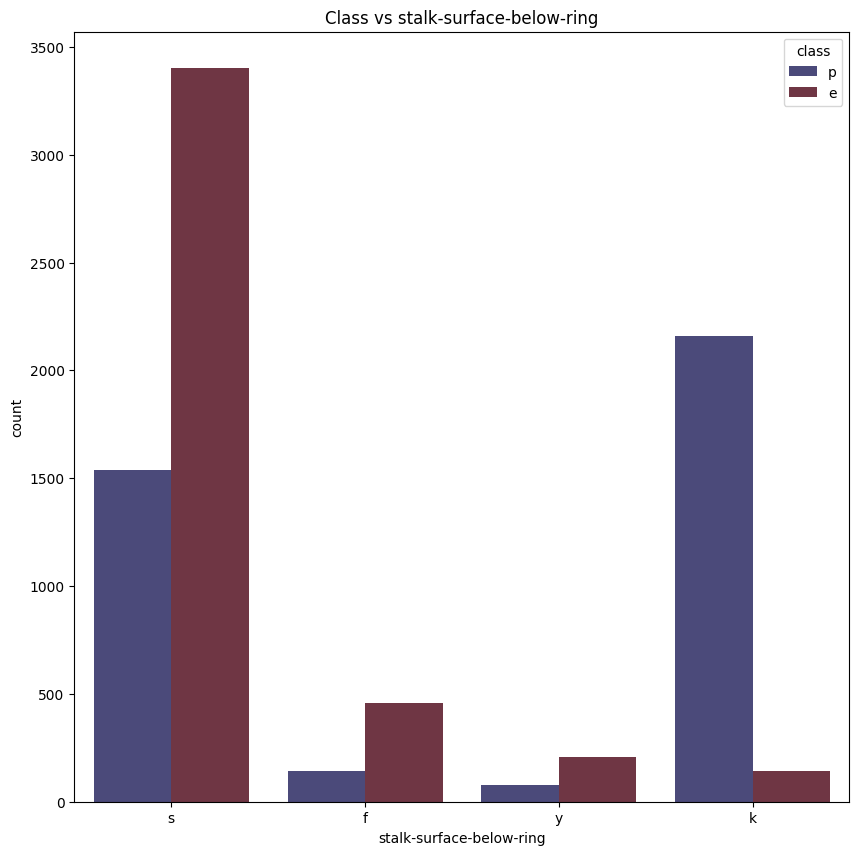

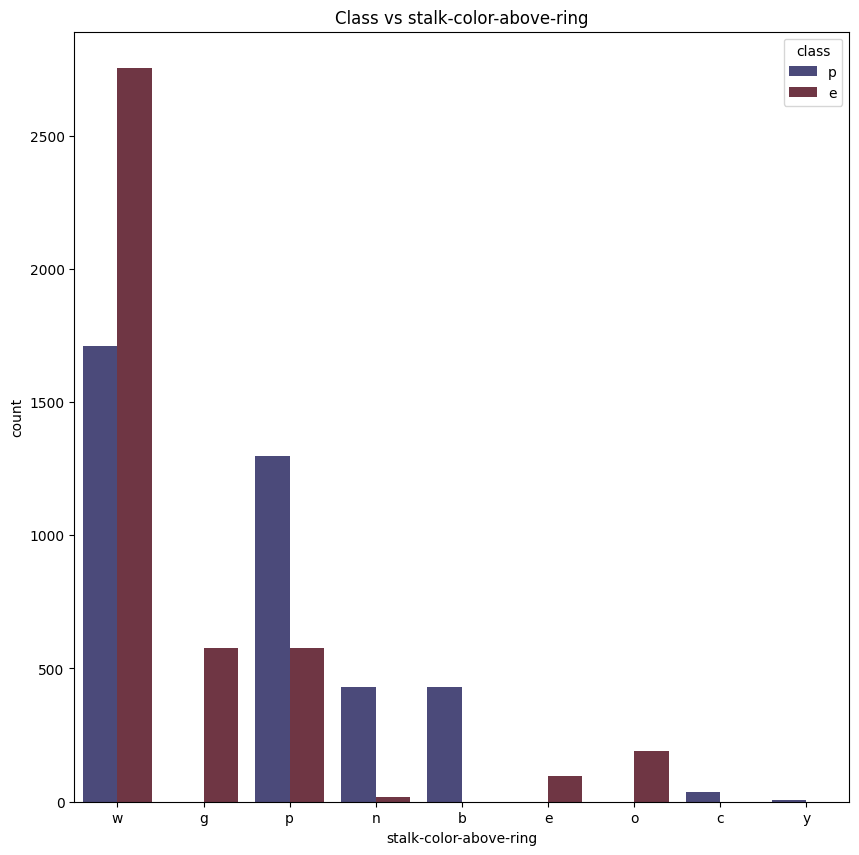

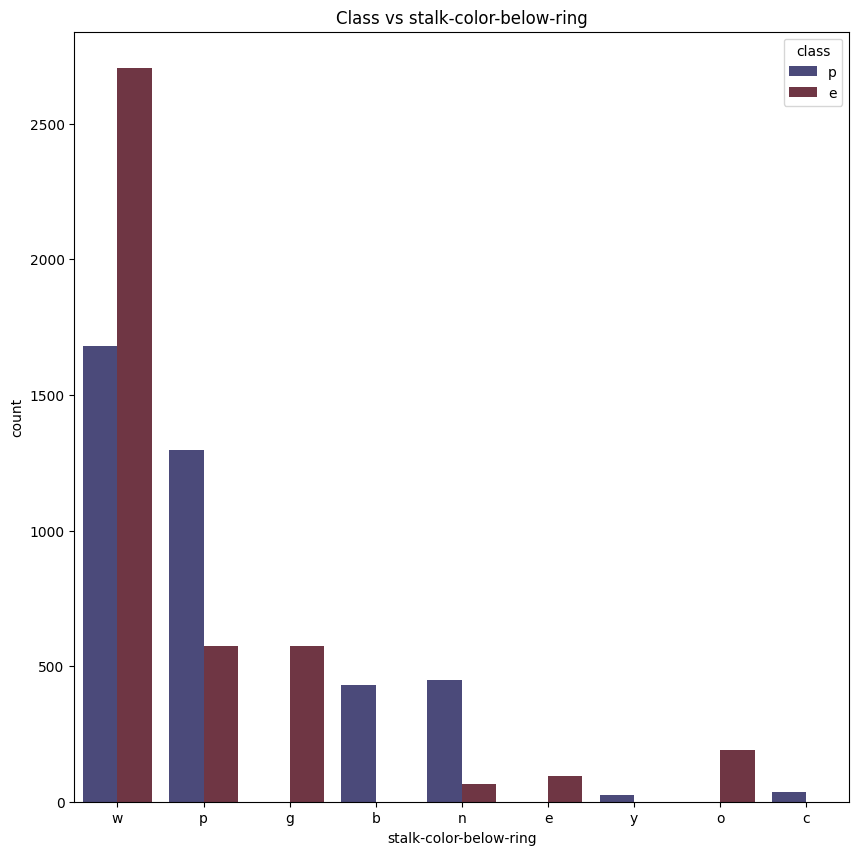

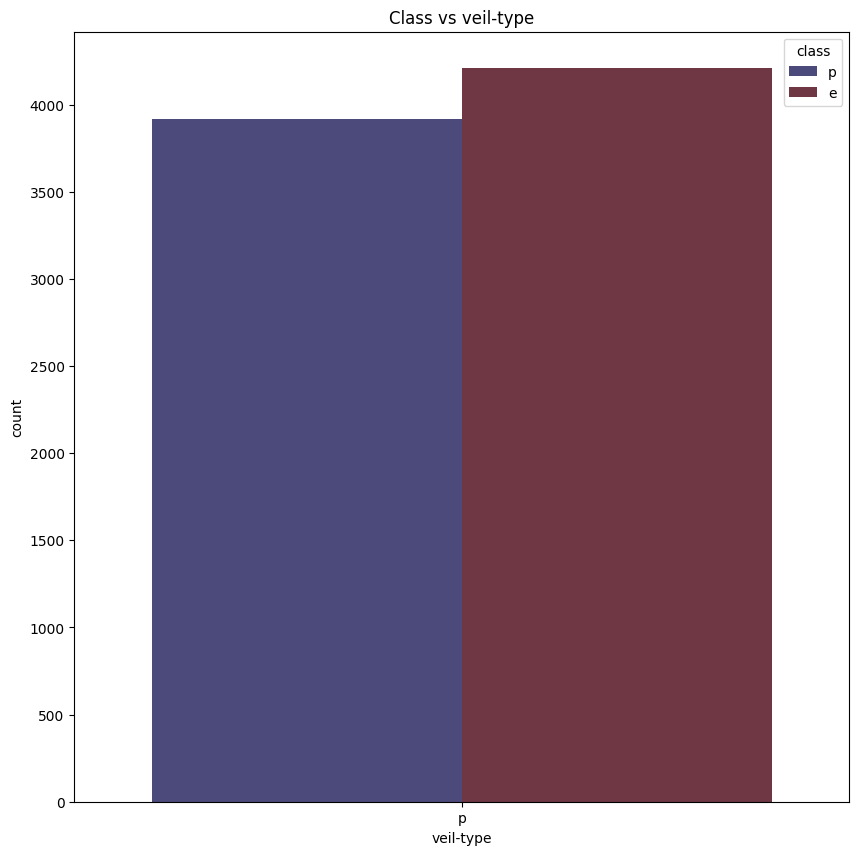

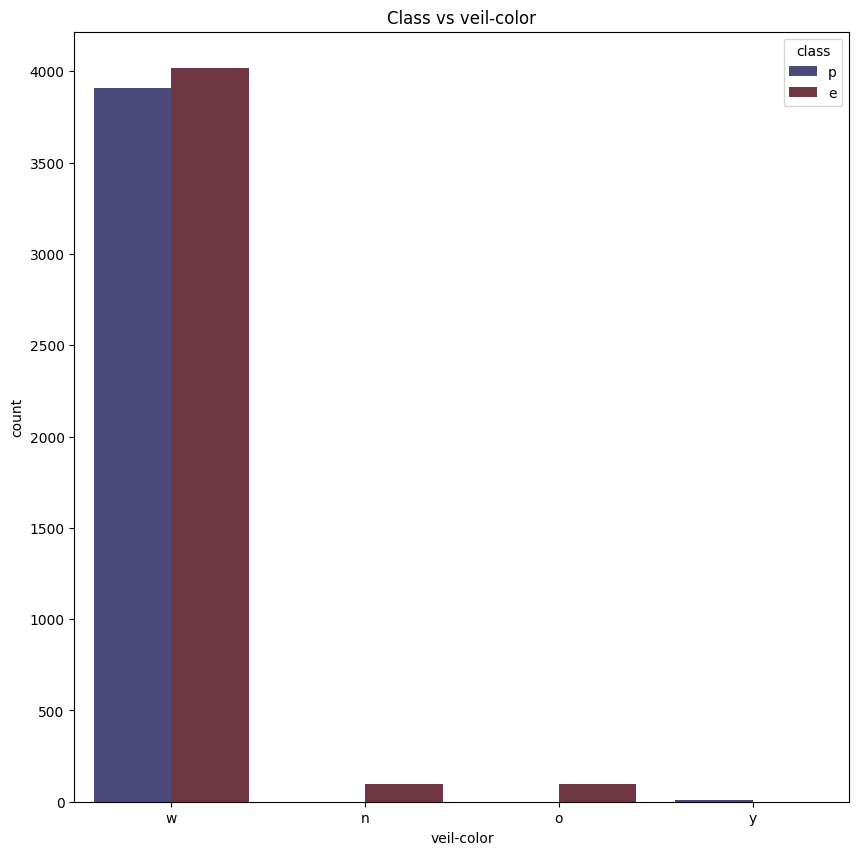

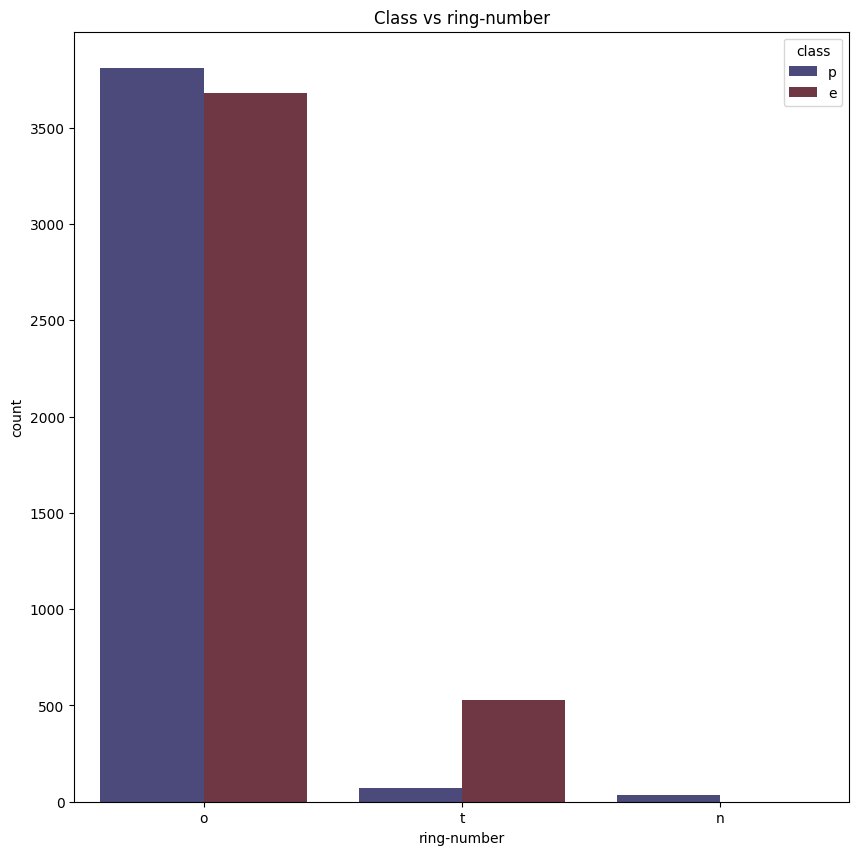

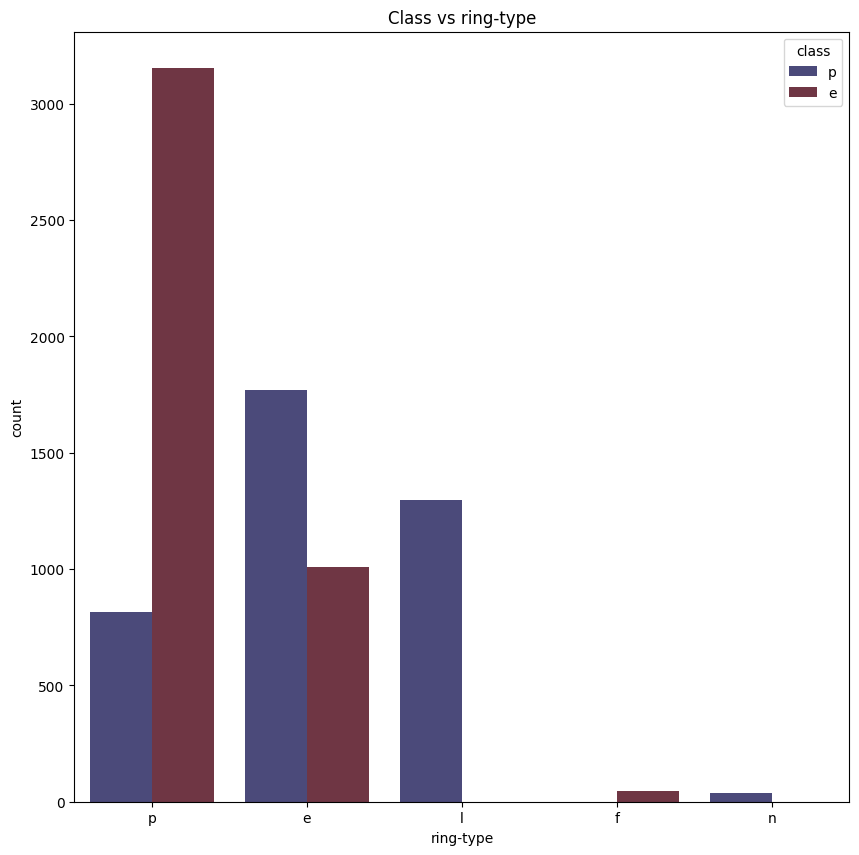

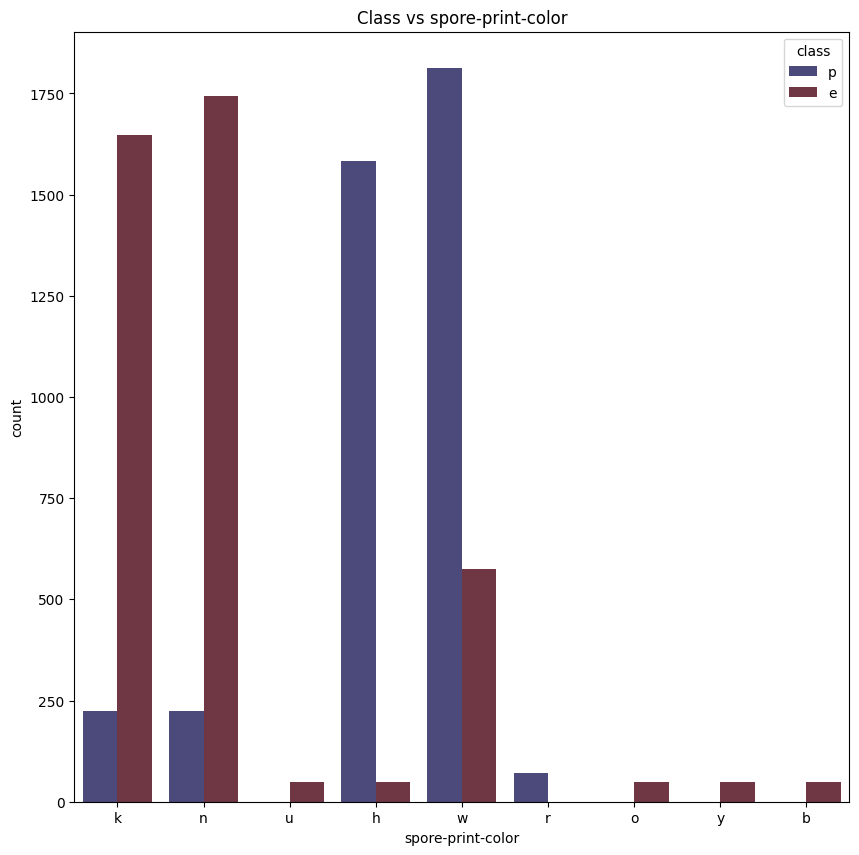

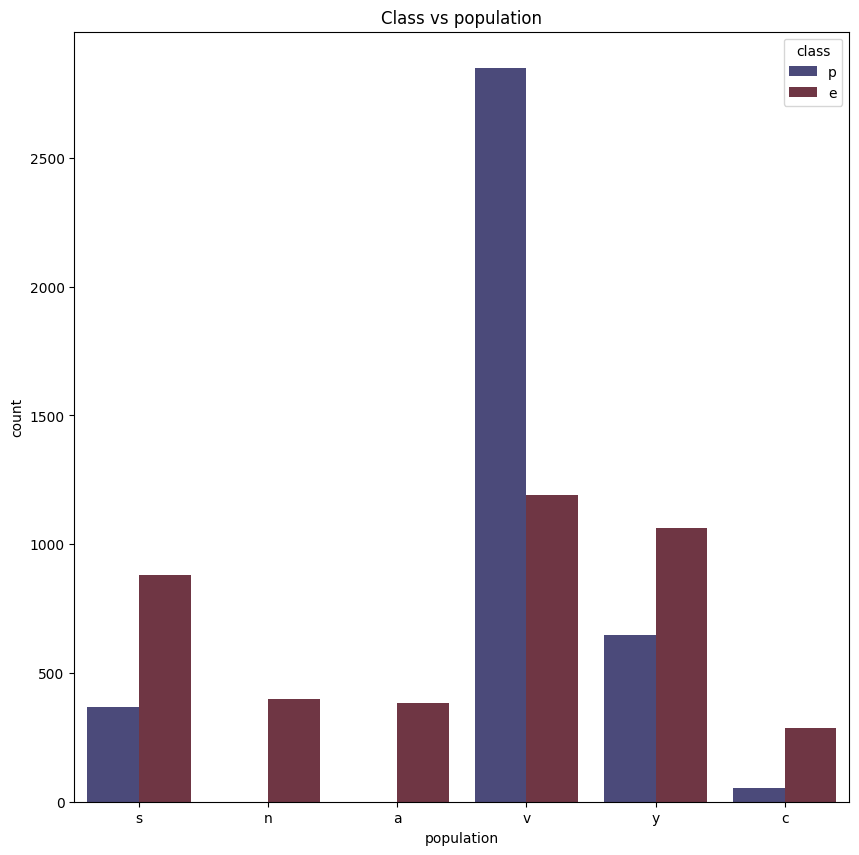

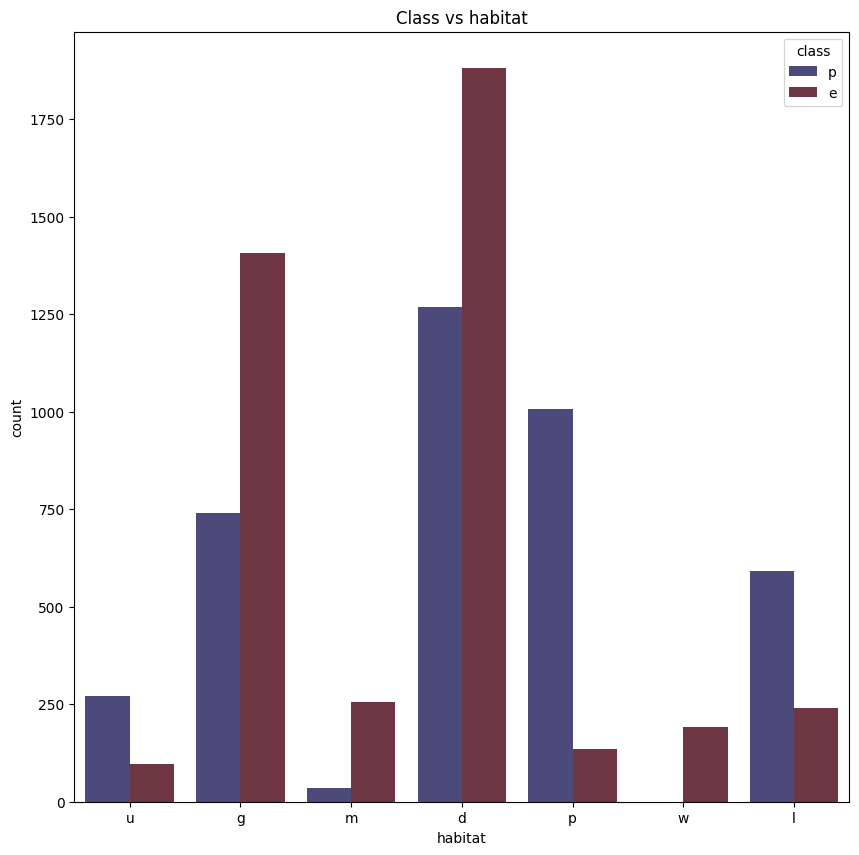

In [ ]:
for col in list_cols:
  plt.figure(figsize=(10,10))
  sns.countplot(x=data[col],hue='class',data=data,palette='icefire')
  plt.title('Class vs {}'.format(col))

Multivariate Analisys:

- cap-shape - Most of the knobbed mushrooms in our dataset are poisonous.
- cap-surface - Most fibrous cap surface are edible.
- cap-color - Most white cap colored mushrooms are edible while most yellow cap colored mushrooms are poisonous.
- bruises - Bruised mushrooms are usually edible while unbruised ones are usually the oppisite.
- odor - No smell mushrooms are mostly edible by a wide margin while all foul smell mushrooms are poisonous.
- gill-attachment - The attached gills are almost always edible.
- gill-spacing - The crowded gills are almost always edible.
- gill-size - The narrow gill sized mushrooms are almost always poisonous.
- gill-color - The buff gill colored mushrooms are always poisonous.
- stalk-shape - insignificant difference betwwen each value in terms of poisonous or edible
- stalk-root - Mushrooms with missing data of stalk roots are usually poisonous.
- stalk-surface-above-ring - The silky mushrooms are usually poisonous, smooth are usually edible.
- stalk-surface-below-ring - About the same as stalk-surface-above-ring.
- stalk-color-above-ring - The white stalk colored mushrooms are usually edible, pink ones are mostly poisonous.
- stalk-color-below-ring - About the same as stalk-color-above-ring.
- veil-type - All veil type of the mushroom's are partial so this column is pretty much usless in our analysis.
- veil-color - Almost all of the mushroom's veil color are white (97.54%) so this column is pretty much usless in our analysis.
- ring-number - Almost all of the mushroom's ring number amount are one (92.17%) so this column is pretty much usless in our analysis.
- ring-type - The pendant ring typed mushrooms are mostly edible,evanescent are mostly poisonous and large ring types are all poisonous.
- spore-print-color - The brown and black ones are almost entirely edible while white and chocolate (20.09%) are mostly poisonous.
- population - Mushrooms with a several population are mostly poisonous.
- habitat - The woods or grasses grown mushrooms are mostly edible.

In [ ]:
data['veil-type'].value_counts()

p    8124
Name: veil-type, dtype: int64

- It does not contribute to the output, hence dropping it.

In [ ]:
data = data.drop('veil-type',axis=1)

In [ ]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
X_data = data.drop(columns='class')
X = pd.get_dummies(X_data,columns=X_data.columns,drop_first=True) # applying encoding to the columns and dropping the first
X.head(2)

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [ ]:
data_categorical = data.astype('category')

In [ ]:
data_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   class                     8124 non-null   category
 1   cap-shape                 8124 non-null   category
 2   cap-surface               8124 non-null   category
 3   cap-color                 8124 non-null   category
 4   bruises                   8124 non-null   category
 5   odor                      8124 non-null   category
 6   gill-attachment           8124 non-null   category
 7   gill-spacing              8124 non-null   category
 8   gill-size                 8124 non-null   category
 9   gill-color                8124 non-null   category
 10  stalk-shape               8124 non-null   category
 11  stalk-root                8124 non-null   category
 12  stalk-surface-above-ring  8124 non-null   category
 13  stalk-surface-below-ring  8124 non-null   catego

In [ ]:
le = LabelEncoder()
for column in data_categorical.columns:
  data_categorical[column] = le.fit_transform(data_categorical[column])

In [ ]:
data_categorical

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


In [ ]:
data_categorical['class'].values

array([1, 0, 0, ..., 0, 1, 0])

<Axes: xlabel='cap-shape'>

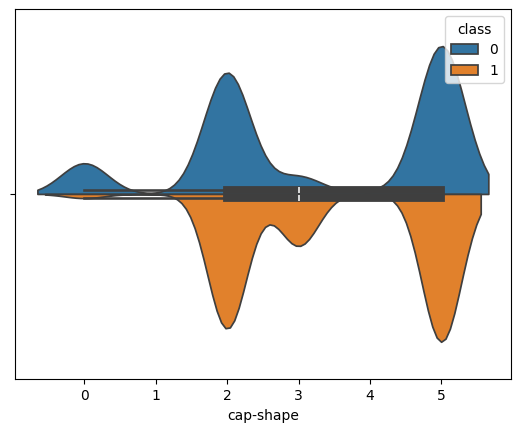

In [ ]:
sns.violinplot(data=data_categorical, x='cap-shape', split=True, hue='class')

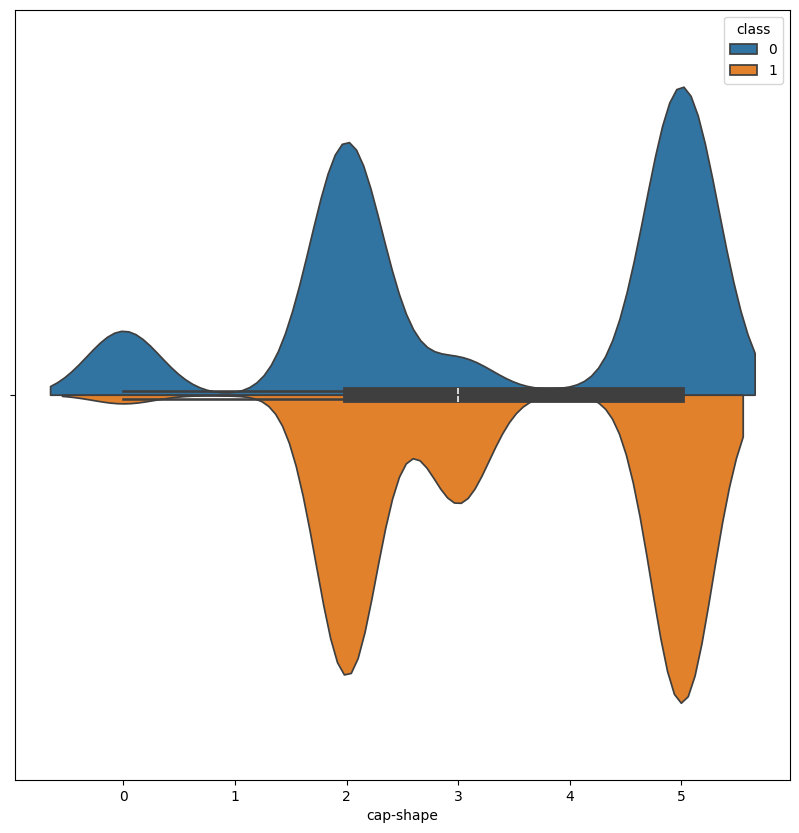

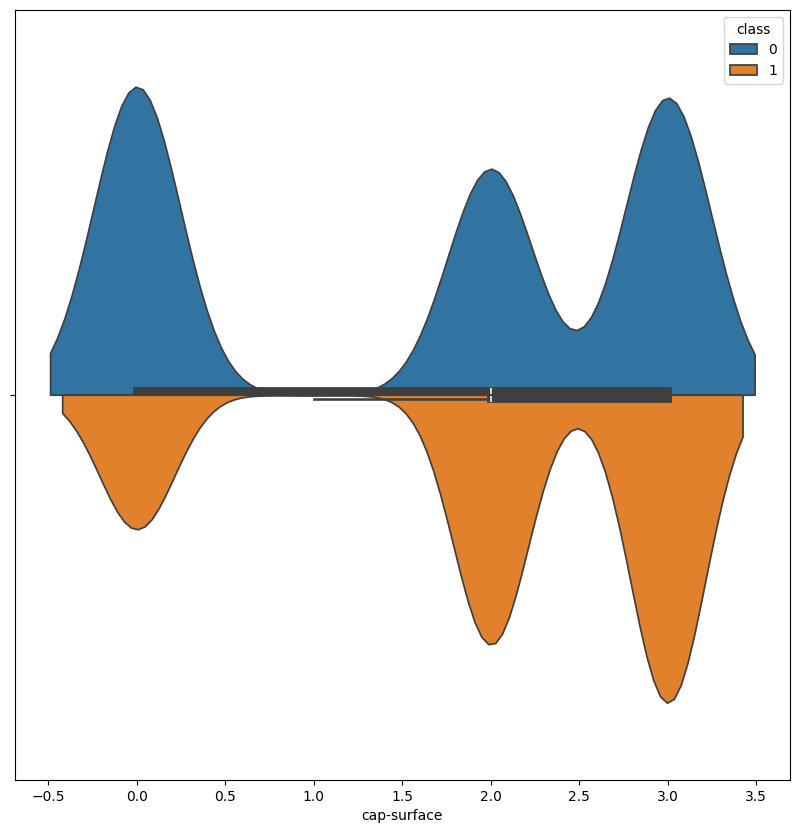

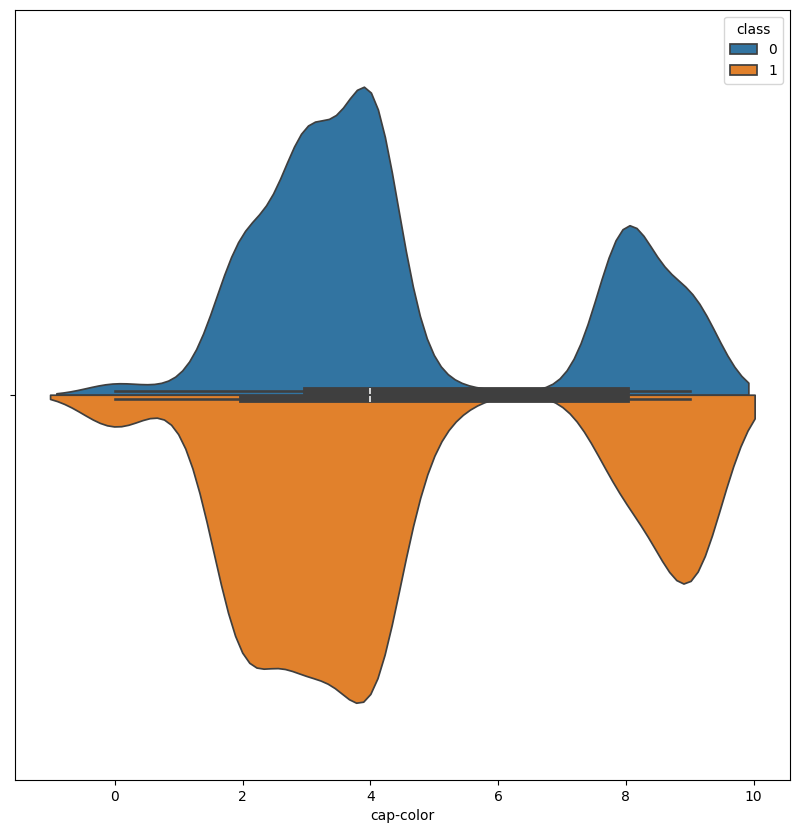

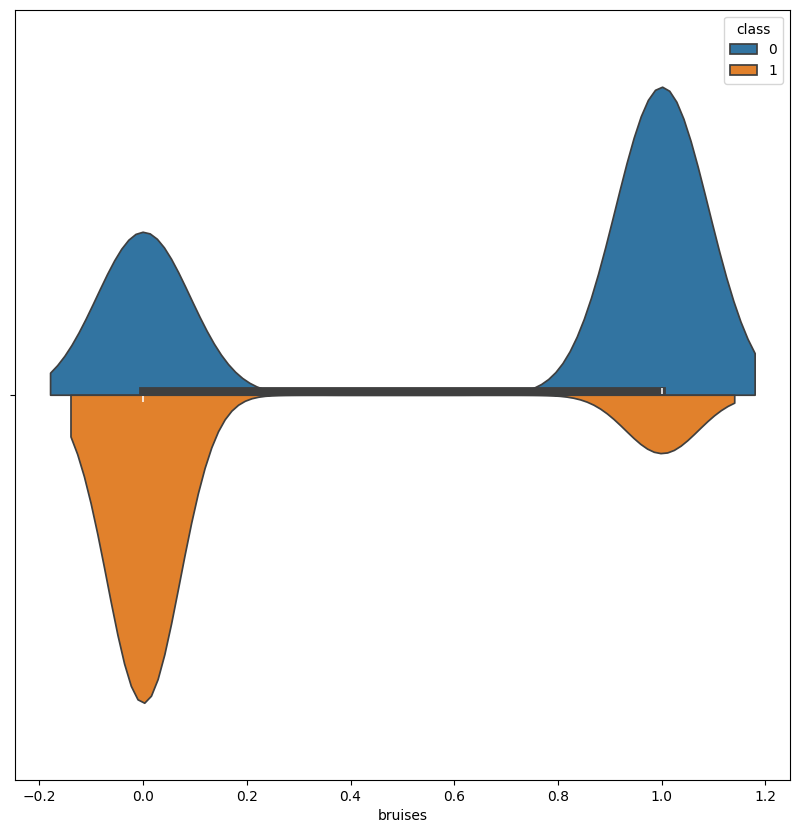

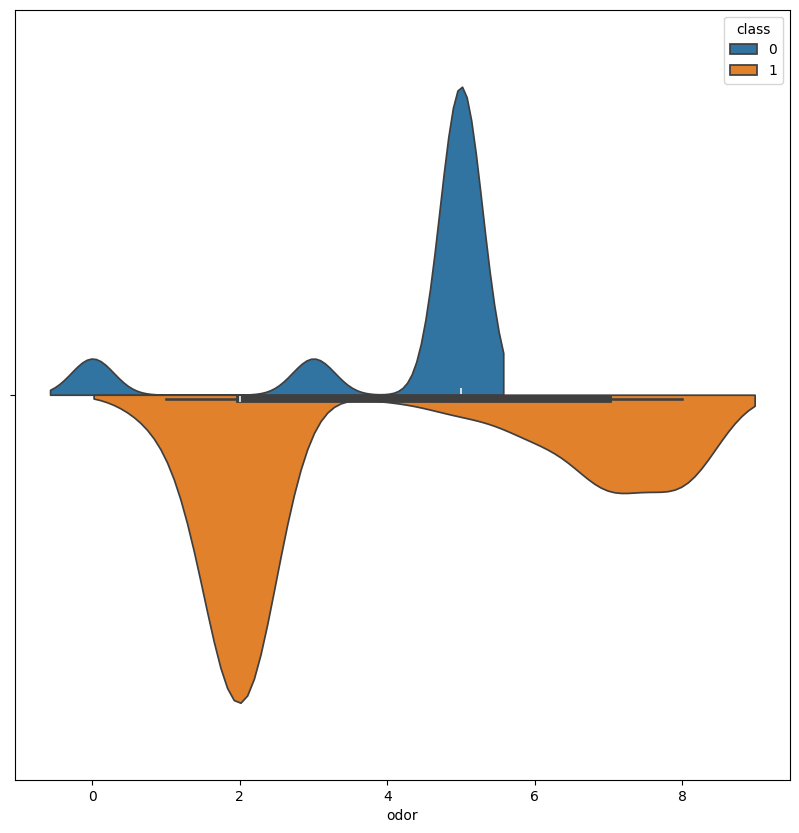

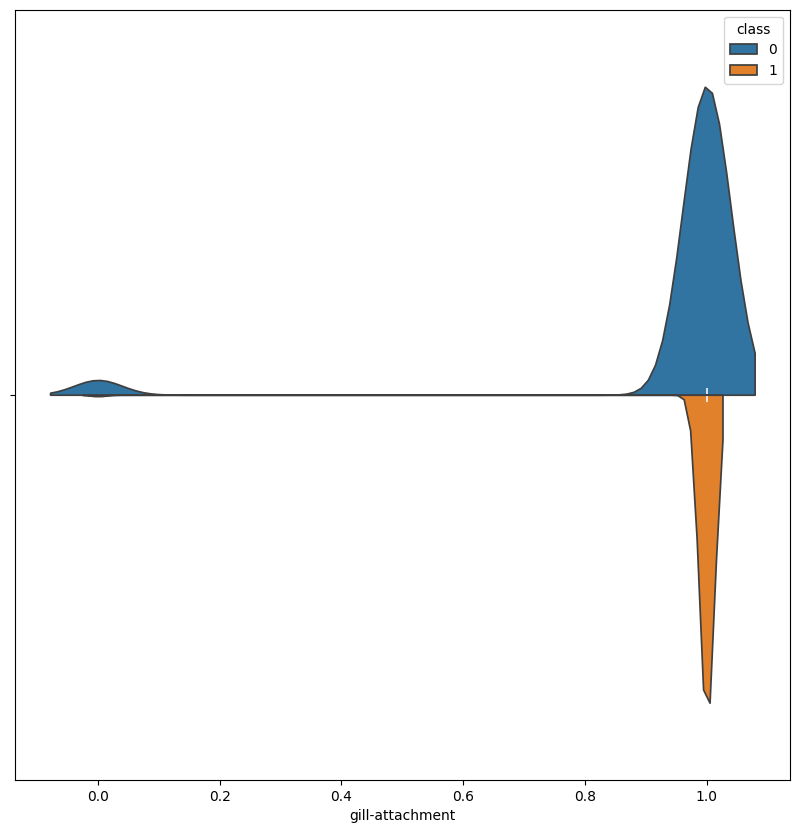

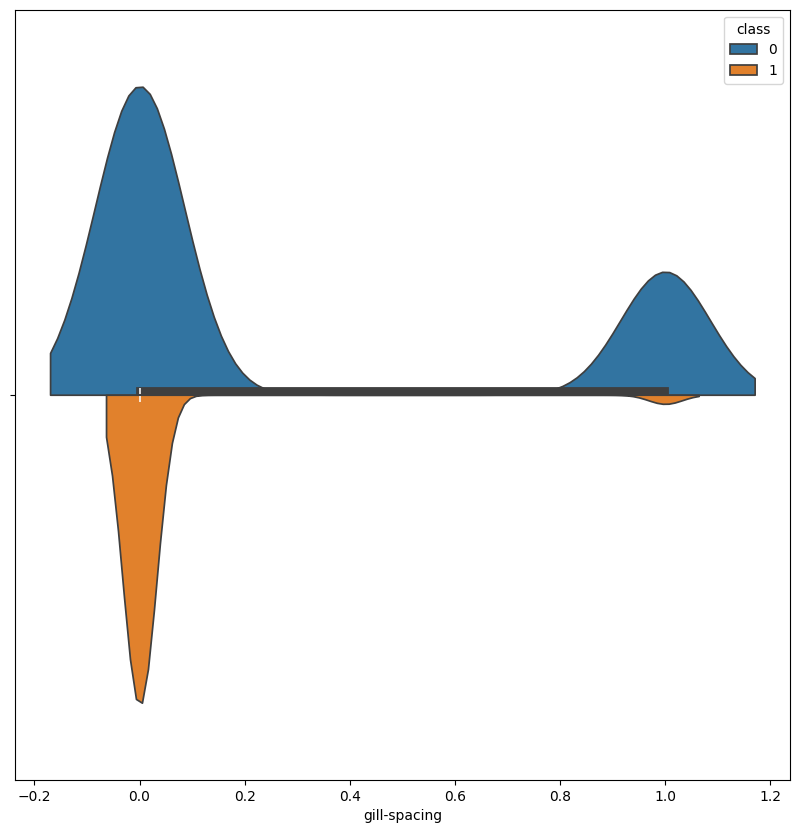

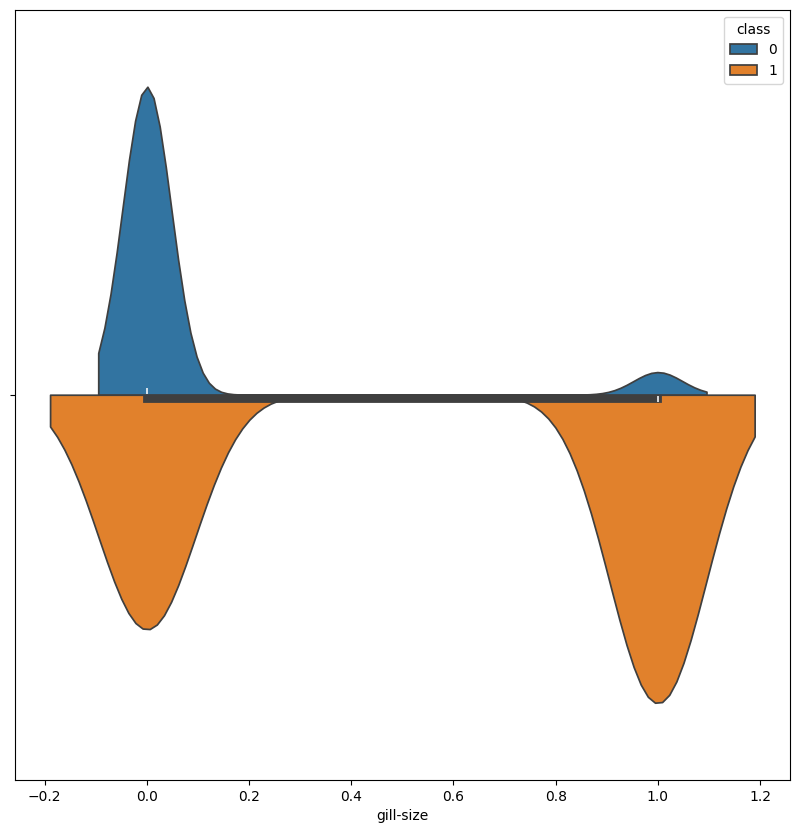

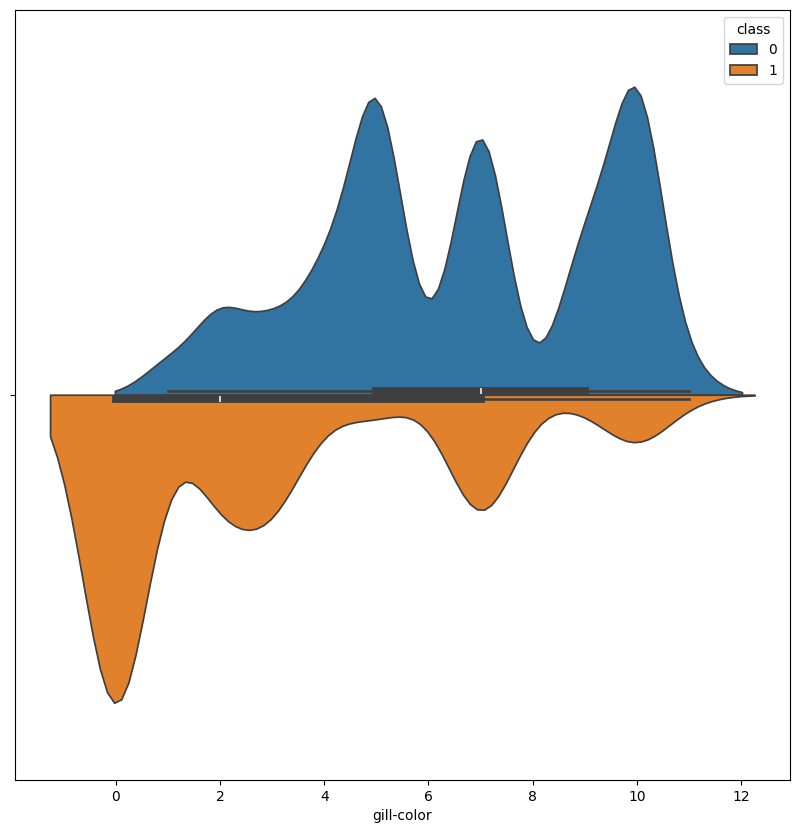

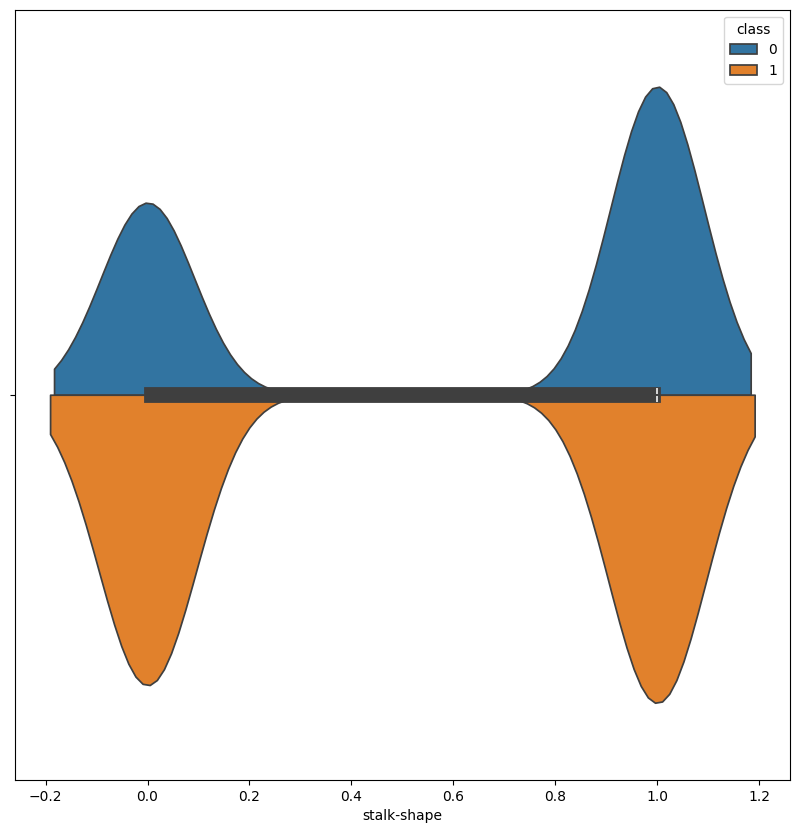

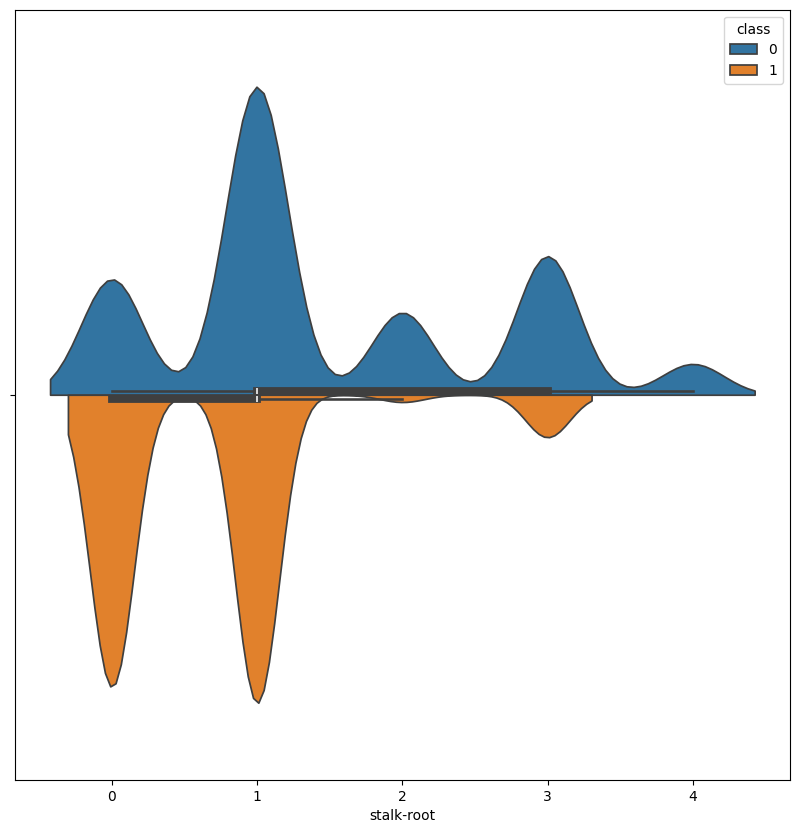

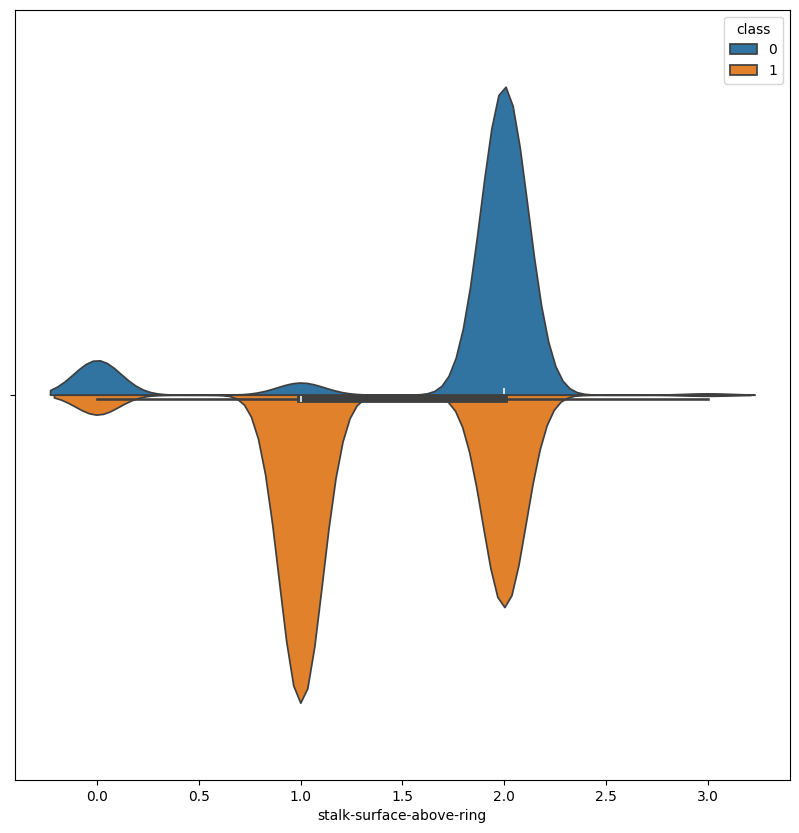

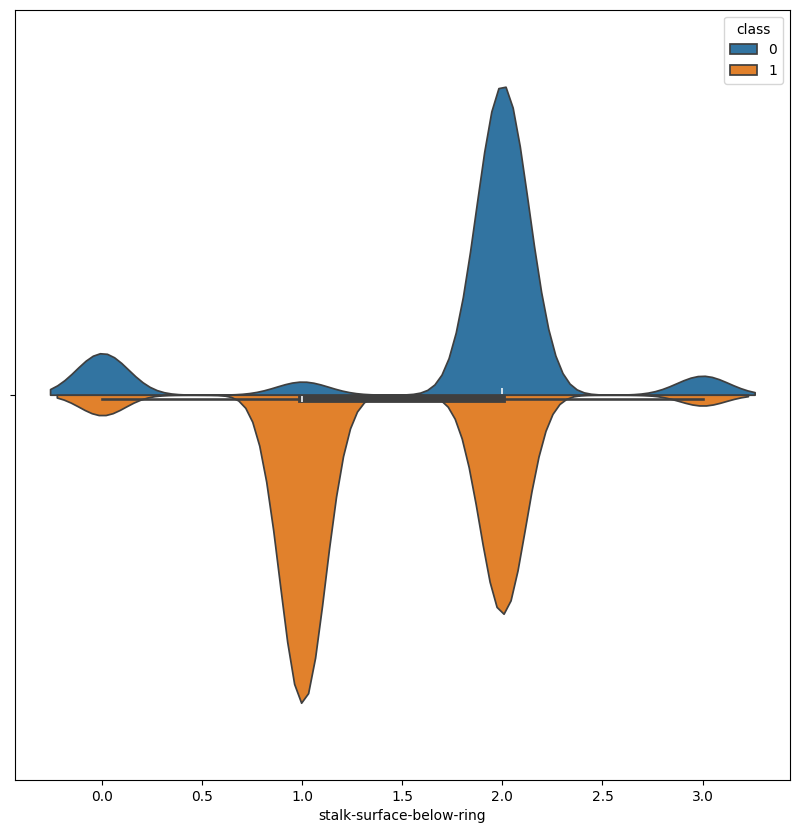

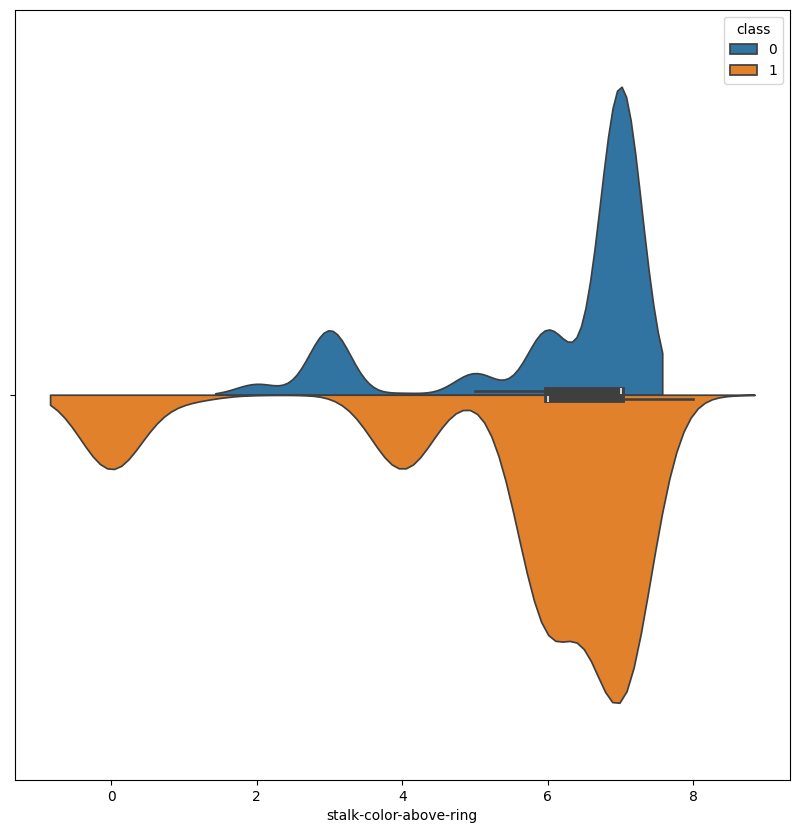

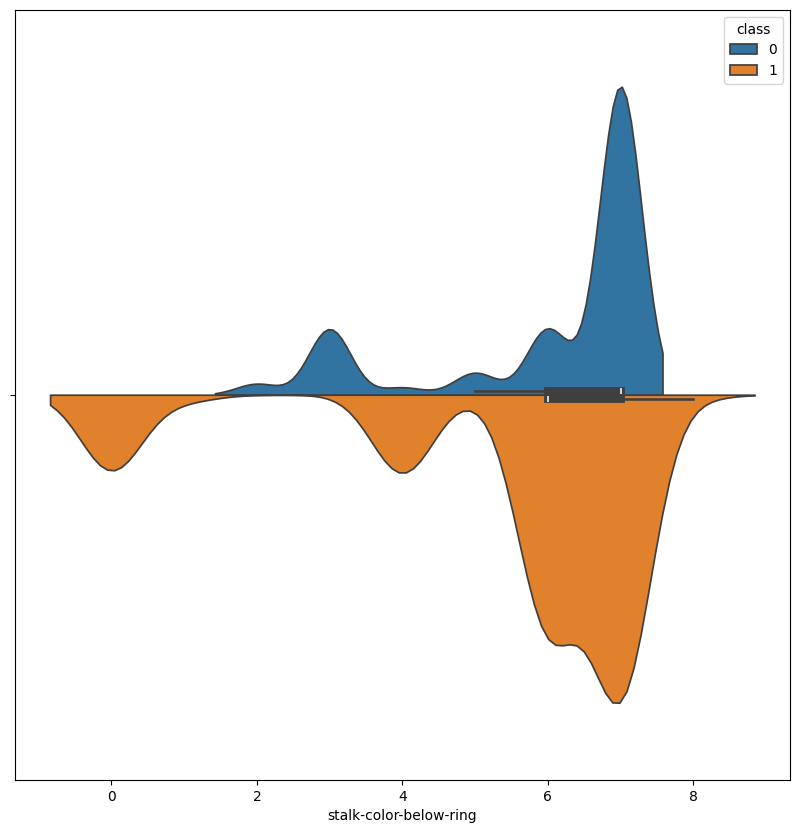

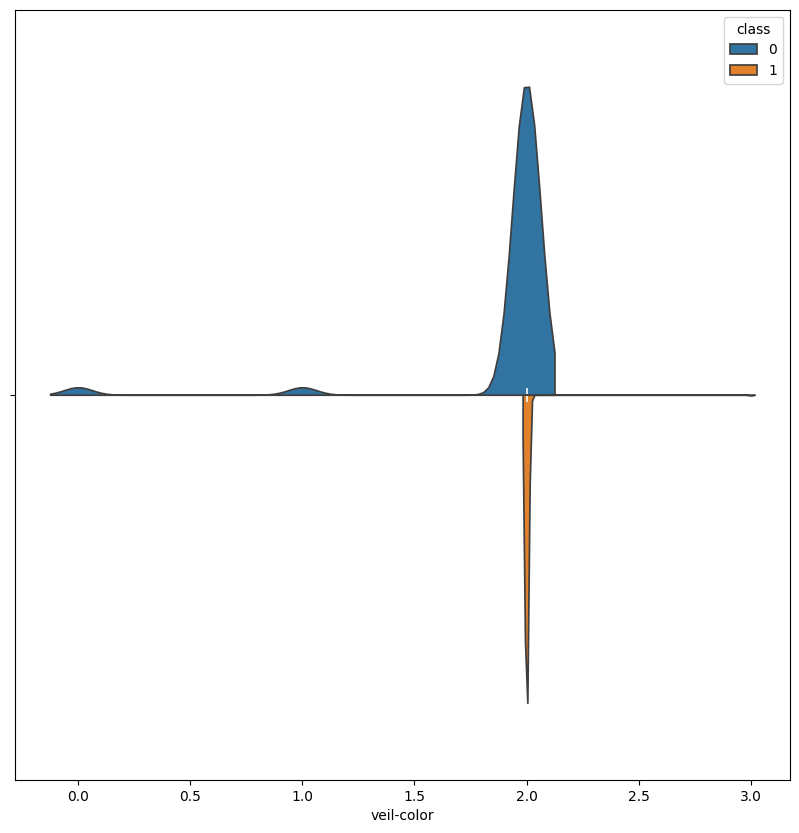

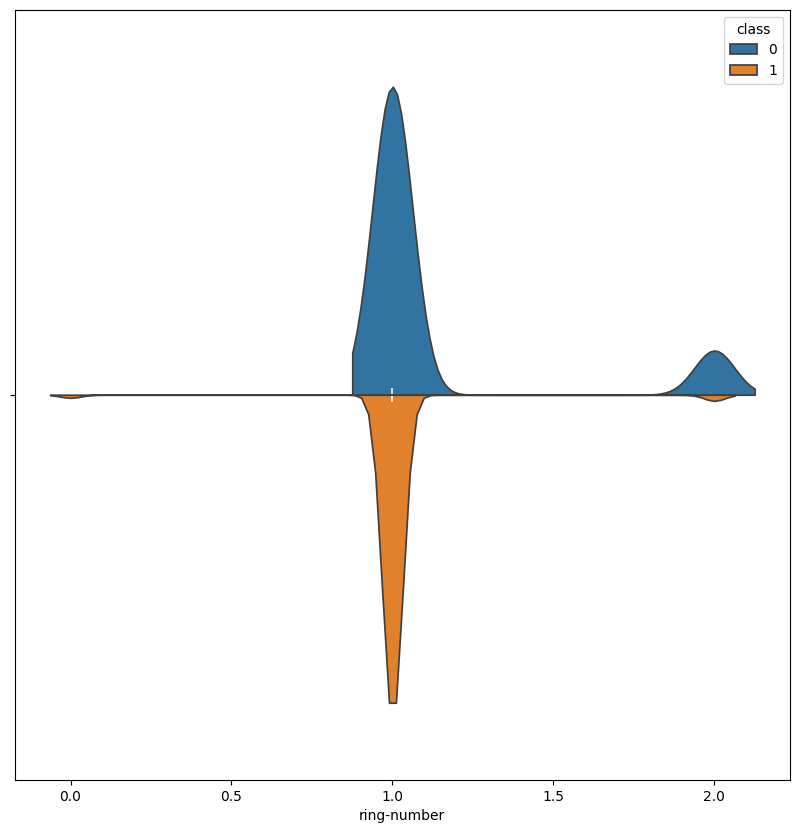

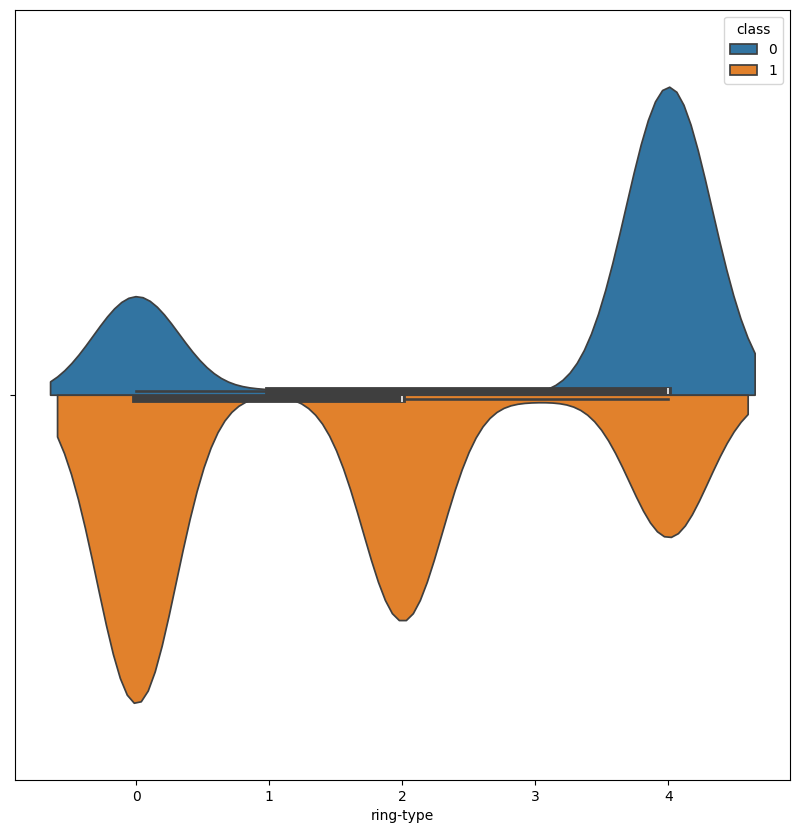

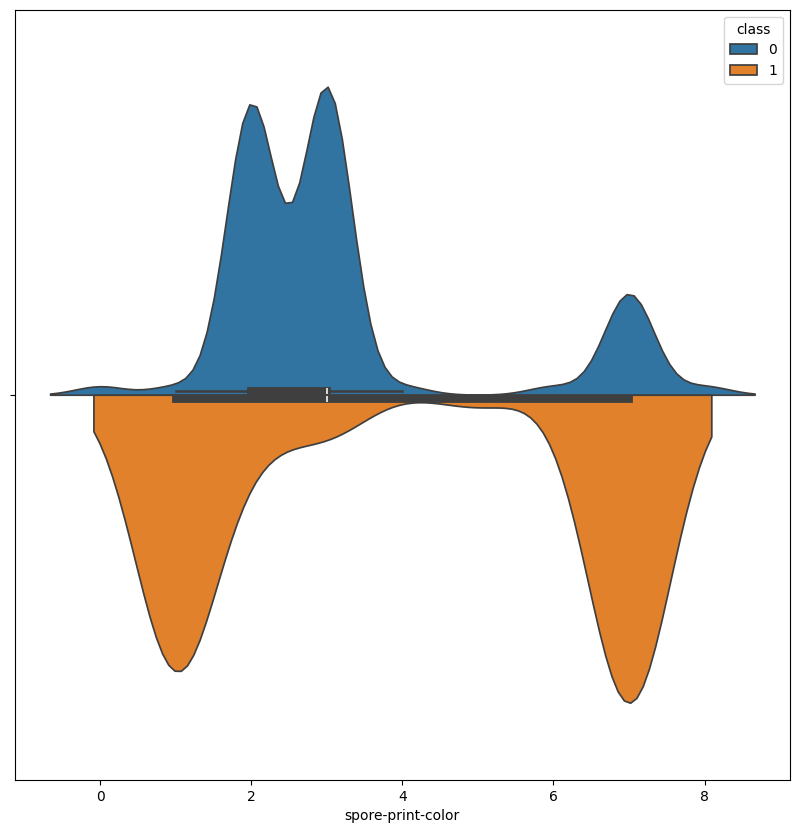

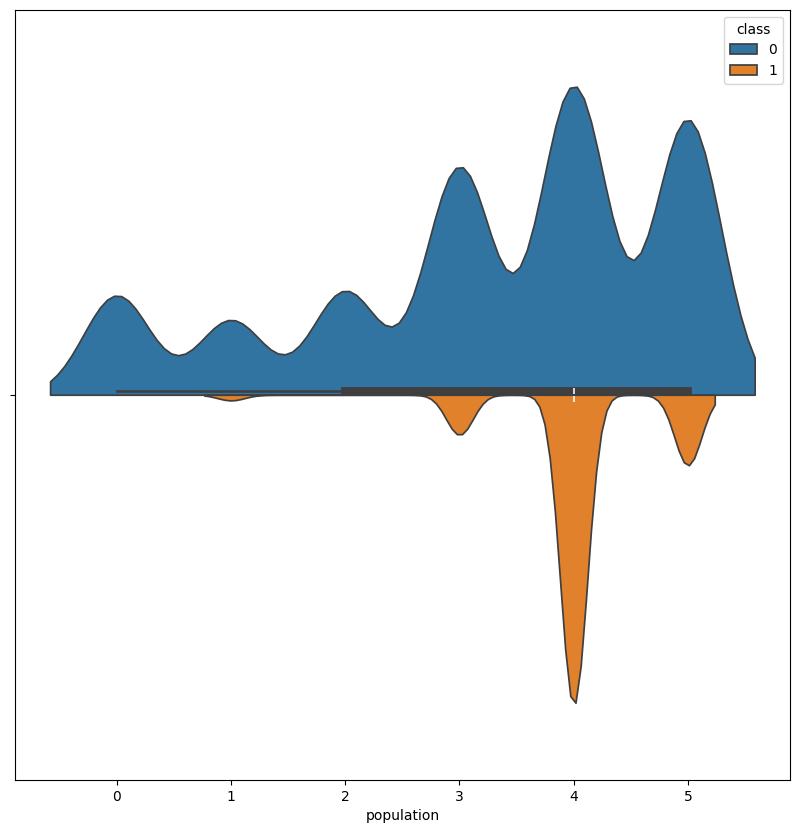

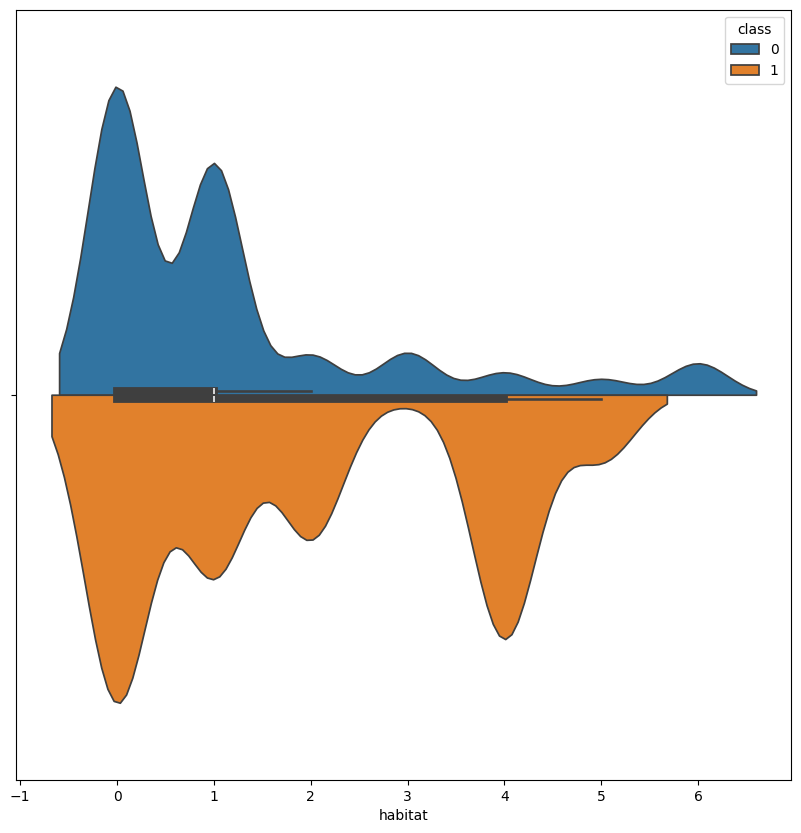

In [ ]:
for col in data_categorical.columns[1:]:
  plt.figure(figsize=(10,10))
  sns.violinplot(data=data_categorical, x=col, split=True, hue='class')
  plt.show()

<Axes: >

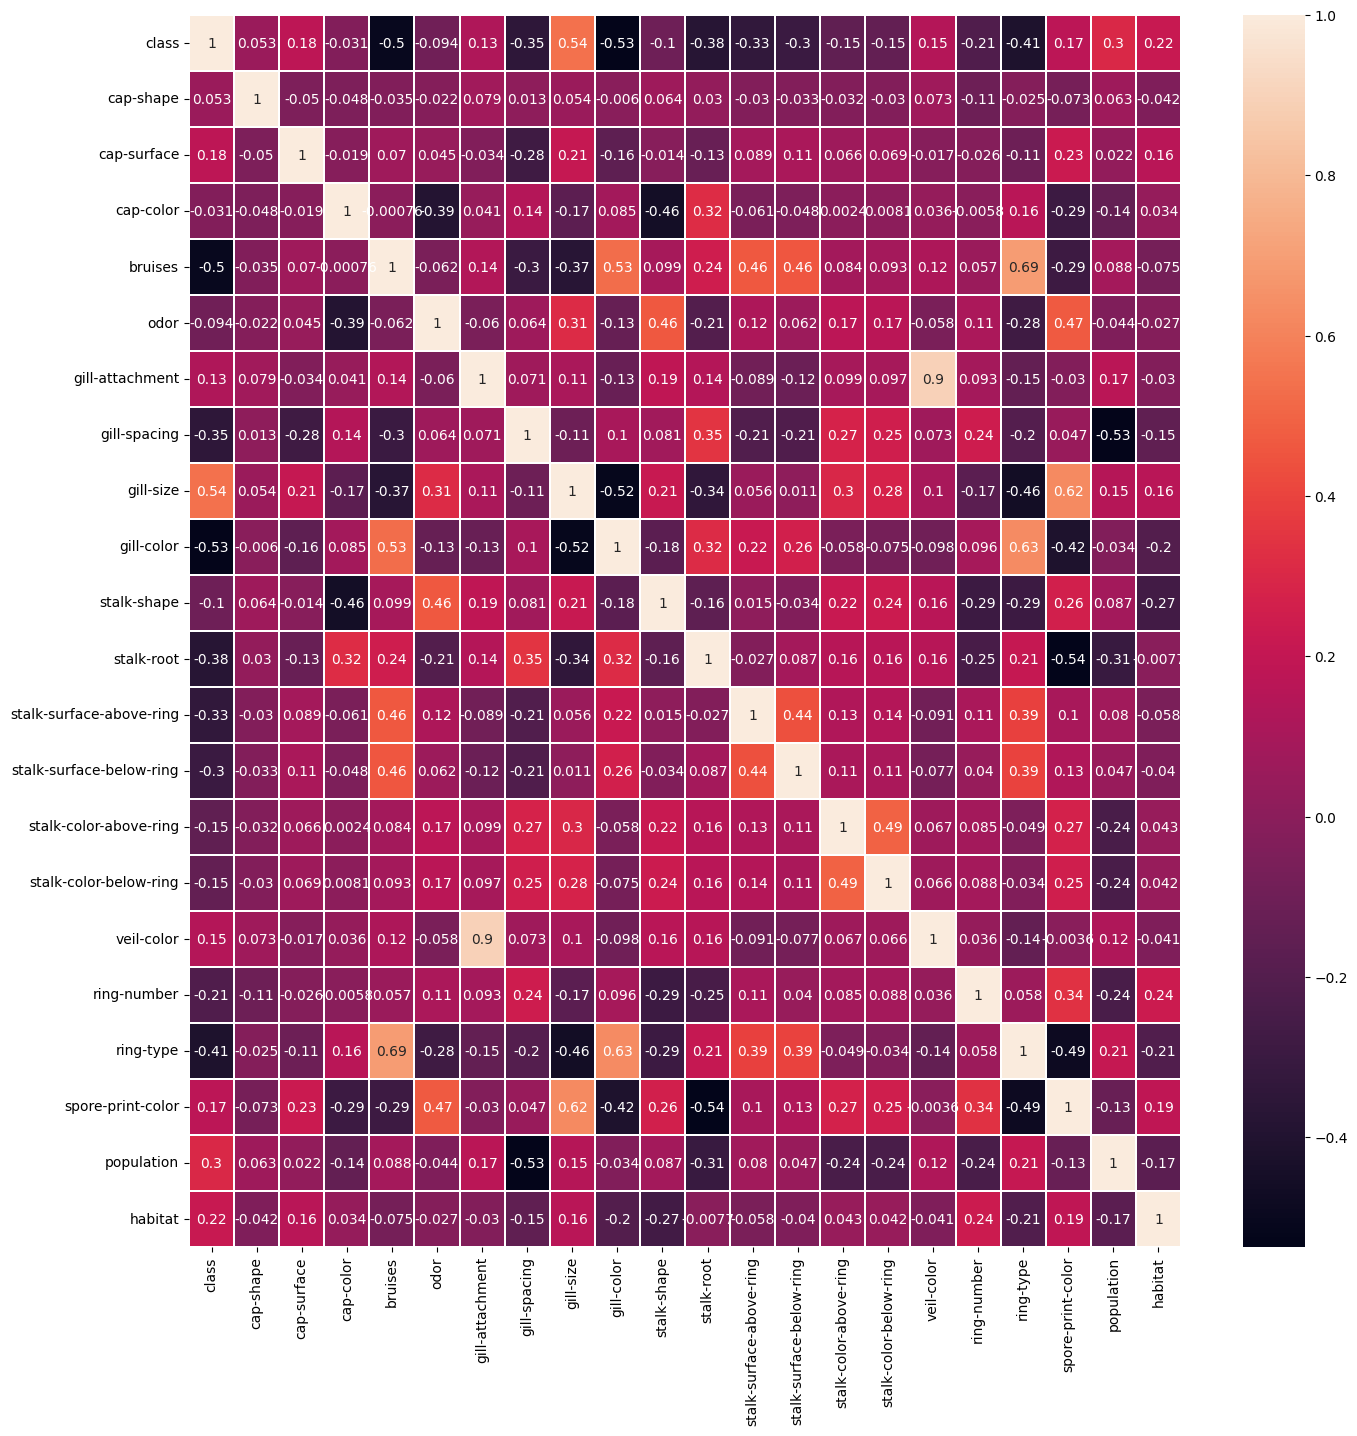

In [ ]:
plt.figure(figsize=(16,16))
sns.heatmap(data_categorical.corr(),linewidth=0.1,annot=True)

- Usually, the least correlating variable is the most important one for classification. In this case, "gill-color" has -0.53

In [ ]:
LE = LabelEncoder()
y = data['class']
y = LE.fit_transform(y) # label encoding the output column
y

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
dt1 = DecisionTreeClassifier()

In [ ]:
scoring = ['accuracy','precision', 'recall','f1']
model_param={}
for score in scoring:
  scores = cross_val_score(dt1,X,y,scoring=score,cv=5) # since the metrics are giving 1.00 wanted to have Cross_validation for checking with kfolds
  model_param[score]=scores.mean()

In [ ]:
model_param

{'accuracy': 0.914305115574081,
 'precision': 0.9940520446096655,
 'recall': 0.9346938775510203,
 'f1': 0.9579567418315692}